## Transformación de datos- para EDA

In [1]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


In [3]:
# Cargamos los datos a dataframe
game_data = pd.read_csv(r'F:/Desktop/Dani_ unificado/SmartPro_Analytics/EDA/data/game_clean.csv')
team_data = pd.read_csv(r'F:/Desktop/Dani_ unificado/SmartPro_Analytics/EDA/data/team_clean.csv')
team_details_data = pd.read_csv(r'F:/Desktop/Dani_ unificado/SmartPro_Analytics/EDA/data/team_details.csv', encoding='latin1')


In [4]:
# Verificamos info de df game_data
game_data.head()

Unnamed: 0  season_id  team_id_home team_abbreviation_home  \
0           0      21946    1610610035                    HUS   
1           1      21946    1610610034                    BOM   
2           2      21946    1610610032                    PRO   
3           3      21946    1610610025                    CHS   
4           4      21946    1610610028                    DEF   

            team_name_home   game_id   game_date matchup_home wl_home  min  \
0          Toronto Huskies  24600001  1946-11-01  HUS vs. NYK       L    0   
1        St. Louis Bombers  24600003  1946-11-02  BOM vs. PIT       W    0   
2  Providence Steamrollers  24600002  1946-11-02  PRO vs. BOS       W    0   
3            Chicago Stags  24600004  1946-11-02  CHS vs. NYK       W    0   
4          Detroit Falcons  24600005  1946-11-02  DEF vs. WAS       L    0   

   ...  reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
0  ...       NaN       NaN       NaN       NaN       NaN      NaN        68   
1  ...       NaN       NaN       NaN       NaN       NaN     25.0        51   
2  ...       NaN       NaN       NaN       NaN       NaN      NaN        53   
3  ...       NaN       NaN       NaN       NaN       NaN     22.0        47   
4  ...       NaN       NaN       NaN       NaN       NaN      NaN        50   

   plus_minus_away  video_available_away     season_type  
0                2                     0  Regular Season  
1               -5                     0  Regular Season  
2               -6                     0  Regular Season  
3              -16                     0  Regular Season  
4               17                     0  Regular Season  

[5 rows x 56 columns]

In [5]:
# Verificamos info de df team_data
team_data.head()


Unnamed: 0          id             full_name abbreviation   nickname  \
0           0  1610612737         Atlanta Hawks          ATL      Hawks   
1           1  1610612738        Boston Celtics          BOS    Celtics   
2           2  1610612739   Cleveland Cavaliers          CLE  Cavaliers   
3           3  1610612740  New Orleans Pelicans          NOP   Pelicans   
4           4  1610612741         Chicago Bulls          CHI      Bulls   

          city          state  year_founded  
0      Atlanta        Atlanta          1949  
1       Boston  Massachusetts          1946  
2    Cleveland           Ohio          1970  
3  New Orleans      Louisiana          2002  
4      Chicago       Illinois          1966

In [6]:
# Verificamos info de df team_details_data
team_details_data.head()

Unnamed: 0     team_id abbreviation   nickname  yearfounded          city  \
0           0  1610612737          ATL      Hawks         1949       Atlanta   
1           1  1610612741          CHI      Bulls         1966       Chicago   
2           2  1610612742          DAL  Mavericks         1980        Dallas   
3           3  1610612743          DEN    Nuggets         1976        Denver   
4           4  1610612744          GSW   Warriors         1946  Golden State   

                      arena  arenacapacity              owner  \
0          State Farm Arena        18729.0       Tony Ressler   
1             United Center        21711.0  Michael Reinsdorf   
2  American Airlines Center        19200.0         Mark Cuban   
3                Ball Arena            NaN       Stan Kroenke   
4              Chase Center            NaN          Joe Lacob   

       generalmanager       headcoach     dleagueaffiliation  \
0      Travis Schlenk     Quin Snyder  College Park Skyhawks   
1  Arturas Karnisovas   Billy Donovan       Windy City Bulls   
2       Nico Harrison      Jason Kidd          Texas Legends   
3        Calvin Booth  Michael Malone      Grand Rapids Gold   
4           Bob Myers      Steve Kerr    Santa Cruz Warriors   

                                 facebook                           instagram  \
0          https://www.facebook.com/hawks      https://instagram.com/atlhawks   
1   https://www.facebook.com/chicagobulls  https://instagram.com/chicagobulls   
2     https://www.facebook.com/dallasmavs    https://instagram.com/dallasmavs   
3  https://www.facebook.com/DenverNuggets       https://instagram.com/nuggets   
4       https://www.facebook.com/warriors      https://instagram.com/warriors   

                            twitter  
0      https://twitter.com/ATLHawks  
1  https://twitter.com/chicagobulls  
2    https://twitter.com/dallasmavs  
3       https://twitter.com/nuggets  
4      https://twitter.com/warriors

In [7]:
# Utilizamos la columna game_date para como date para un análisis temporal
game_data['game_date'] = pd.to_datetime(game_data['game_date'])

In [8]:
# Verificamos la conversión
print(game_data.head())
print(game_data.dtypes)

   Unnamed: 0  season_id  team_id_home team_abbreviation_home  \
0           0      21946    1610610035                    HUS   
1           1      21946    1610610034                    BOM   
2           2      21946    1610610032                    PRO   
3           3      21946    1610610025                    CHS   
4           4      21946    1610610028                    DEF   

            team_name_home   game_id  game_date matchup_home wl_home  min  \
0          Toronto Huskies  24600001 1946-11-01  HUS vs. NYK       L    0   
1        St. Louis Bombers  24600003 1946-11-02  BOM vs. PIT       W    0   
2  Providence Steamrollers  24600002 1946-11-02  PRO vs. BOS       W    0   
3            Chicago Stags  24600004 1946-11-02  CHS vs. NYK       W    0   
4          Detroit Falcons  24600005 1946-11-02  DEF vs. WAS       L    0   

   ...  reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
0  ...       NaN       NaN       NaN       NaN       NaN      NaN  

In [9]:
# Filtramos las filas donde 'game_date' es posterior a 2013
game_data = game_data[game_data['game_date'].dt.year >= 2013]

# Verificamos el DataFrame resultante
game_data.head()


Unnamed: 0  season_id  team_id_home team_abbreviation_home  \
52071       52071      42012    1610612743                    DEN   
52072       52072      42012    1610612751                    BKN   
52073       52073      42012    1610612752                    NYK   
52074       52074      42012    1610612746                    LAC   
52075       52075      42012    1610612754                    IND   

             team_name_home   game_id  game_date matchup_home wl_home  min  \
52071        Denver Nuggets  41200161 2013-04-20  DEN vs. GSW       W  240   
52072         Brooklyn Nets  41200131 2013-04-20  BKN vs. CHI       W  240   
52073       New York Knicks  41200111 2013-04-20  NYK vs. BOS       W  240   
52074  Los Angeles Clippers  41200171 2013-04-20  LAC vs. MEM       W  240   
52075        Indiana Pacers  41200121 2013-04-21  IND vs. ATL       W  240   

       ...  reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  \
52071  ...      55.0      27.0       4.0      10.0      18.0     21.0   
52072  ...      35.0      15.0       4.0       5.0      10.0     17.0   
52073  ...      40.0      18.0       5.0       5.0      21.0     17.0   
52074  ...      23.0      22.0       3.0       1.0       7.0     29.0   
52075  ...      32.0      23.0       5.0       3.0      16.0     26.0   

       pts_away  plus_minus_away  video_available_away  season_type  
52071        95               -2                     1     Playoffs  
52072        89              -17                     1     Playoffs  
52073        78               -7                     1     Playoffs  
52074        91              -21                     0     Playoffs  
52075        90              -17                     1     Playoffs  

[5 rows x 56 columns]

In [10]:
# Creamos una columna de año
game_data['year'] = game_data['game_date'].dt.year
game_data.head()

Unnamed: 0  season_id  team_id_home team_abbreviation_home  \
52071       52071      42012    1610612743                    DEN   
52072       52072      42012    1610612751                    BKN   
52073       52073      42012    1610612752                    NYK   
52074       52074      42012    1610612746                    LAC   
52075       52075      42012    1610612754                    IND   

             team_name_home   game_id  game_date matchup_home wl_home  min  \
52071        Denver Nuggets  41200161 2013-04-20  DEN vs. GSW       W  240   
52072         Brooklyn Nets  41200131 2013-04-20  BKN vs. CHI       W  240   
52073       New York Knicks  41200111 2013-04-20  NYK vs. BOS       W  240   
52074  Los Angeles Clippers  41200171 2013-04-20  LAC vs. MEM       W  240   
52075        Indiana Pacers  41200121 2013-04-21  IND vs. ATL       W  240   

       ...  ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  \
52071  ...      27.0       4.0      10.0      18.0     21.0        95   
52072  ...      15.0       4.0       5.0      10.0     17.0        89   
52073  ...      18.0       5.0       5.0      21.0     17.0        78   
52074  ...      22.0       3.0       1.0       7.0     29.0        91   
52075  ...      23.0       5.0       3.0      16.0     26.0        90   

       plus_minus_away  video_available_away  season_type  year  
52071               -2                     1     Playoffs  2013  
52072              -17                     1     Playoffs  2013  
52073               -7                     1     Playoffs  2013  
52074              -21                     0     Playoffs  2013  
52075              -17                     1     Playoffs  2013  

[5 rows x 57 columns]

In [11]:
# Definimos los equipos de la NBA por conferencia
conferencia_este = [
    "Boston Celtics", "Brooklyn Nets", "New York Knicks", "Philadelphia 76ers", "Toronto Raptors",
    "Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Indiana Pacers", "Milwaukee Bucks",
    "Atlanta Hawks", "Charlotte Hornets", "Miami Heat", "Orlando Magic", "Washington Wizards"
]

conferencia_oeste = [
    "Dallas Mavericks", "Houston Rockets", "Memphis Grizzlies", "New Orleans Pelicans", "San Antonio Spurs",
    "Denver Nuggets", "Minnesota Timberwolves", "Oklahoma City Thunder", "Portland Trail Blazers", "Utah Jazz",
    "Golden State Warriors", "Los Angeles Clippers", "Los Angeles Lakers", "Phoenix Suns", "Sacramento Kings"
]


In [12]:
# Creamos un diccionario para almacenar los equipos por conferencia
equipos_nba = {
    "Este": conferencia_este,
    "Oeste": conferencia_oeste
}


In [13]:
# contamos equipos por conferencia
num_equipos_este = len(conferencia_este)
num_equipos_oeste = len(conferencia_oeste)

print(f"Equipos Conferencia Este: {num_equipos_este}")
print(f"Equipos Conferencia Oeste: {num_equipos_oeste}")


Equipos Conferencia Este: 15
Equipos Conferencia Oeste: 15


In [16]:
# Verificar la existencia de los equipos en el DataFrame
equipos_presentes = set(game_data['team_name_home'].unique()).union(set(game_data['team_name_away'].unique()))

equipos_faltantes_este = [equipo for equipo in conferencia_este if equipo not in equipos_presentes]
equipos_faltantes_oeste = [equipo for equipo in conferencia_oeste if equipo not in equipos_presentes]

# Mostrar los equipos faltantes
if equipos_faltantes_este:
    print(f"Equipos faltantes en la conferencia Este: {equipos_faltantes_este}")
else:
    print("Todos los equipos de la conferencia Este están presentes en el DataFrame.")

if equipos_faltantes_oeste:
    print(f"Equipos faltantes en la conferencia Oeste: {equipos_faltantes_oeste}")
else:
    print("Todos los equipos de la conferencia Oeste están presentes en el DataFrame.")


Todos los equipos de la conferencia Este están presentes en el DataFrame.
Todos los equipos de la conferencia Oeste están presentes en el DataFrame.


Listo los campos de cada df

In [17]:
# Listar los campos de cada DataFrame
print("Campos del DataFrame game_data:")
print(game_data.columns.tolist())
print()

print("Campos del DataFrame team_data:")
print(team_data.columns.tolist())
print()

print("Campos del DataFrame team_details_data:")
print(team_details_data.columns.tolist())

Campos del DataFrame game_data:
['Unnamed: 0', 'season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home', 'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home', 'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away', 'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away', 'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away', 'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away', 'season_type', 'year']

Campos del DataFrame team_data:
['Unnamed: 0', 'id', 'full_name', 'abbreviation', 'nickname', 'city', 'state', 'year_founded']

Campos del DataFrame team_details_data:

In [20]:
# Mostrar la estructura de los DataFrames
print(game_data.info())
print(game_data.head())

print(team_data.info())
print(team_data.head())

print(team_details_data.info())
print(team_details_data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 13627 entries, 52071 to 65697
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              13627 non-null  int64         
 1   season_id               13627 non-null  int64         
 2   team_id_home            13627 non-null  int64         
 3   team_abbreviation_home  13627 non-null  object        
 4   team_name_home          13627 non-null  object        
 5   game_id                 13627 non-null  int64         
 6   game_date               13627 non-null  datetime64[ns]
 7   matchup_home            13627 non-null  object        
 8   wl_home                 13627 non-null  object        
 9   min                     13627 non-null  int64         
 10  fgm_home                13627 non-null  float64       
 11  fga_home                13627 non-null  float64       
 12  fg_pct_home             13627 non-null  float64

In [21]:
# Verificacion de NULOS
import pandas as pd

# Verificar la cantidad de valores nulos en cada columna
print("Valores nulos en game_data:")
print(game_data.isnull().sum())

print("\nValores nulos en team_data:")
print(team_data.isnull().sum())

print("\nValores nulos en team_details_data:")
print(team_details_data.isnull().sum())


Valores nulos en game_data:
Unnamed: 0                0
season_id                 0
team_id_home              0
team_abbreviation_home    0
team_name_home            0
game_id                   0
game_date                 0
matchup_home              0
wl_home                   0
min                       0
fgm_home                  0
fga_home                  0
fg_pct_home               0
fg3m_home                 0
fg3a_home                 0
fg3_pct_home              0
ftm_home                  0
fta_home                  0
ft_pct_home               2
oreb_home                 0
dreb_home                 0
reb_home                  0
ast_home                  0
stl_home                  0
blk_home                  0
tov_home                  0
pf_home                   0
pts_home                  0
plus_minus_home           0
video_available_home      0
team_id_away              0
team_abbreviation_away    0
team_name_away            0
matchup_away              0
wl_away             

In [22]:
# Verificar la cantidad de filas duplicadas
print("\nFilas duplicadas en game_data:", game_data.duplicated().sum())
print("Filas duplicadas en team_data:", team_data.duplicated().sum())
print("Filas duplicadas en team_details_data:", team_details_data.duplicated().sum())



Filas duplicadas en game_data: 0
Filas duplicadas en team_data: 0
Filas duplicadas en team_details_data: 0


In [36]:
# Resumen de cada tabla
def summarize_df(df, name):
    print(f"--- Resumen de la tabla {name} ---")
    print(f"Dimensiones: {df.shape}")
    print(f"Tipos de datos:\n{df.dtypes}")
    print(f"Valores faltantes:\n{df.isnull().sum()}")
    print(f"Descripción estadística (numérica):\n{df.describe(include=[int, float])}")
    print(f"Descripción estadística (categórica):\n{df.describe(include=[object])}")
    print(f"Primeras filas:\n{df.head()}")
    print(f"Últimas filas:\n{df.tail()}")
    print(f"Valores únicos:\n{df.nunique()}")
    print("\n")

# Resumir cada tabla
summarize_df(game_data, "game_data")
summarize_df(team_data, "team_data")
summarize_df(team_details_data, "team_details_data")

--- Resumen de la tabla game_data ---
Dimensiones: (13627, 57)
Tipos de datos:
Unnamed: 0                         int64
season_id                          int64
team_id_home                       int64
team_abbreviation_home            object
team_name_home                    object
game_id                            int64
game_date                 datetime64[ns]
matchup_home                      object
wl_home                           object
min                                int64
fgm_home                         float64
fga_home                         float64
fg_pct_home                      float64
fg3m_home                        float64
fg3a_home                        float64
fg3_pct_home                     float64
ftm_home                         float64
fta_home                         float64
ft_pct_home                      float64
oreb_home                        float64
dreb_home                        float64
reb_home                         float64
ast_home           

### Tabla `game_data`

- **Dimensiones:** (13627, 57)
- **Tipos de datos:** int64, float64, datetime64[ns], object
- **Valores faltantes:** `ft_pct_home`, `ft_pct_away`, `arenacapacity` tienen algunos valores faltantes.
- **Descripción estadística (numérica):** Describe las principales estadísticas para campos como `min`, `fgm_home`, `fg_pct_home`, `fta_home`, etc.
- **Descripción estadística (categórica):** Incluye estadísticas para campos categóricos como `team_abbreviation_home`, `team_name_home`, `matchup_home`, etc.

### Tabla `team_data`

- **Dimensiones:** (30, 8)
- **Tipos de datos:** int64, object
- **Valores faltantes:** No hay valores faltantes.
- **Descripción estadística (numérica):** Describe las principales estadísticas para campos numéricos como `year_founded`.
- **Descripción estadística (categórica):** Incluye estadísticas para campos categóricos como `full_name`, `abbreviation`, `nickname`, `city`, `state`.

### Tabla `team_details_data`

- **Dimensiones:** (25, 15)
- **Tipos de datos:** int64, float64, object
- **Valores faltantes:** `arenacapacity` y `headcoach` tienen algunos valores faltantes.
- **Descripción estadística (numérica):** Describe las principales estadísticas para campos numéricos como `yearfounded` y `arenacapacity`.
- **Descripción estadística (categórica):** Incluye estadísticas para campos categóricos como `abbreviation`, `nickname`, `city`, `arena`, `owner`, etc.

## Estadística descriptiva

In [23]:
# Medidas estadísticas básicas
print(game_data.describe())

# Medidas específicas
mean_pts_home = game_data['pts_home'].mean()
median_pts_home = game_data['pts_home'].median()
std_pts_home = game_data['pts_home'].std()

print(f'Mean Pts Home: {mean_pts_home}')
print(f'Median Pts Home: {median_pts_home}')
print(f'Std Pts Home: {std_pts_home}')


         Unnamed: 0     season_id  team_id_home       game_id  \
count  13627.000000  13627.000000  1.362700e+04  1.362700e+04   
mean   58884.000000  22867.882806  1.609549e+09  2.258761e+07   
min    52071.000000  12013.000000  9.400000e+01  1.130000e+07   
25%    55477.500000  22015.000000  1.610613e+09  2.150024e+07   
50%    58884.000000  22017.000000  1.610613e+09  2.170119e+07   
75%    62290.500000  22020.000000  1.610613e+09  2.200108e+07   
max    65697.000000  42022.000000  1.610617e+09  4.220040e+07   
std     3933.920394   5629.605212  4.137917e+07  5.636390e+06   

                           game_date           min      fgm_home  \
count                          13627  13627.000000  13627.000000   
mean   2018-06-05 23:52:48.855947776    241.647978     39.895355   
min              2013-02-17 00:00:00    180.000000     19.000000   
25%              2015-12-12 00:00:00    240.000000     36.000000   
50%              2018-03-04 00:00:00    240.000000     40.000000   
75%   

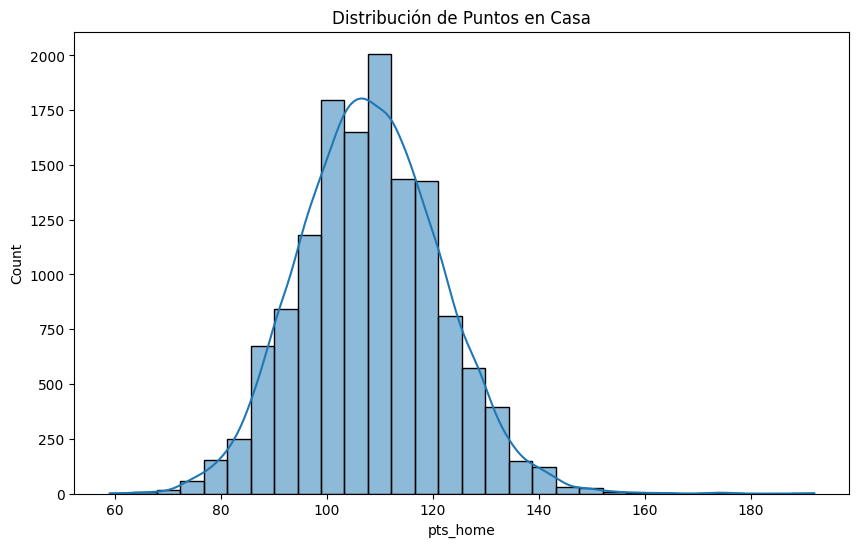

In [25]:
# Distribuciones y frecuencias

# Histogramas
plt.figure(figsize=(10, 6))
sns.histplot(game_data['pts_home'], bins=30, kde=True)
plt.title('Distribución de Puntos en Casa')
plt.show()



In [26]:
# Tablas de frecuencia
wl_home_freq = game_data['wl_home'].value_counts()
print(wl_home_freq)


wl_home
W    7805
L    5822
Name: count, dtype: int64


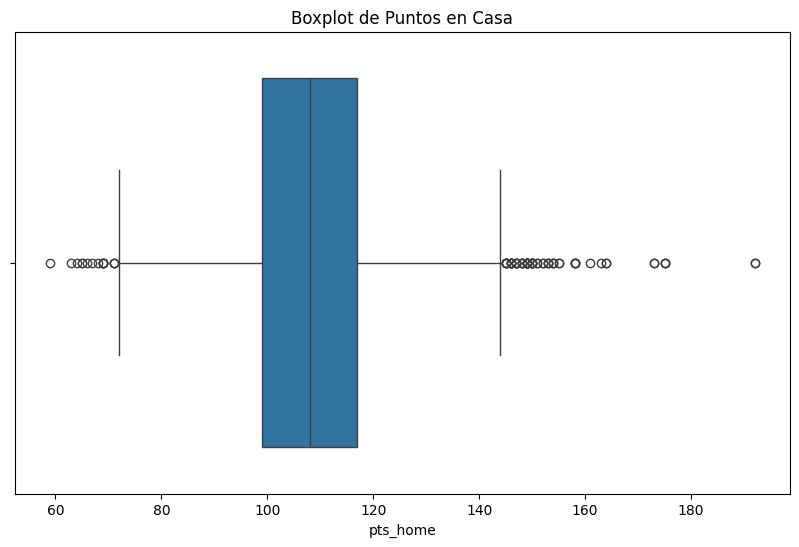

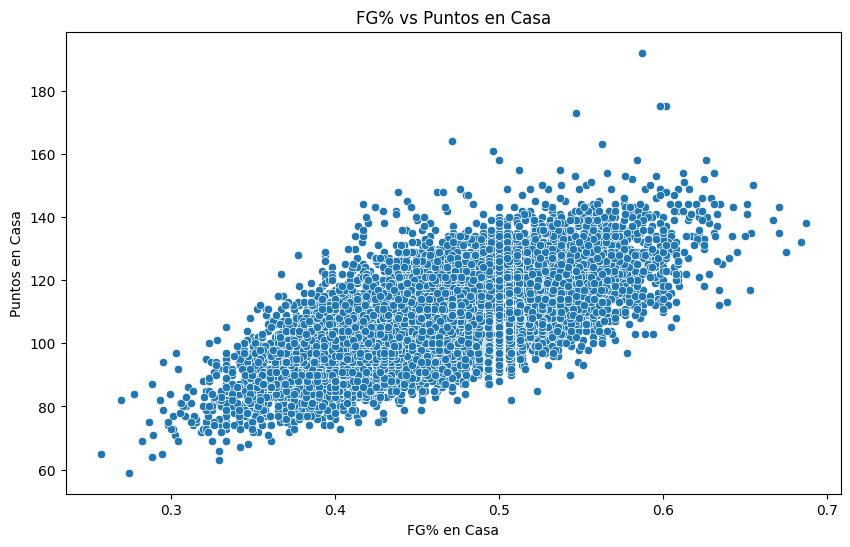

In [27]:
# Detección de Outliers
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=game_data['pts_home'])
plt.title('Boxplot de Puntos en Casa')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=game_data['fg_pct_home'], y=game_data['pts_home'])
plt.title('FG% vs Puntos en Casa')
plt.xlabel('FG% en Casa')
plt.ylabel('Puntos en Casa')
plt.show()


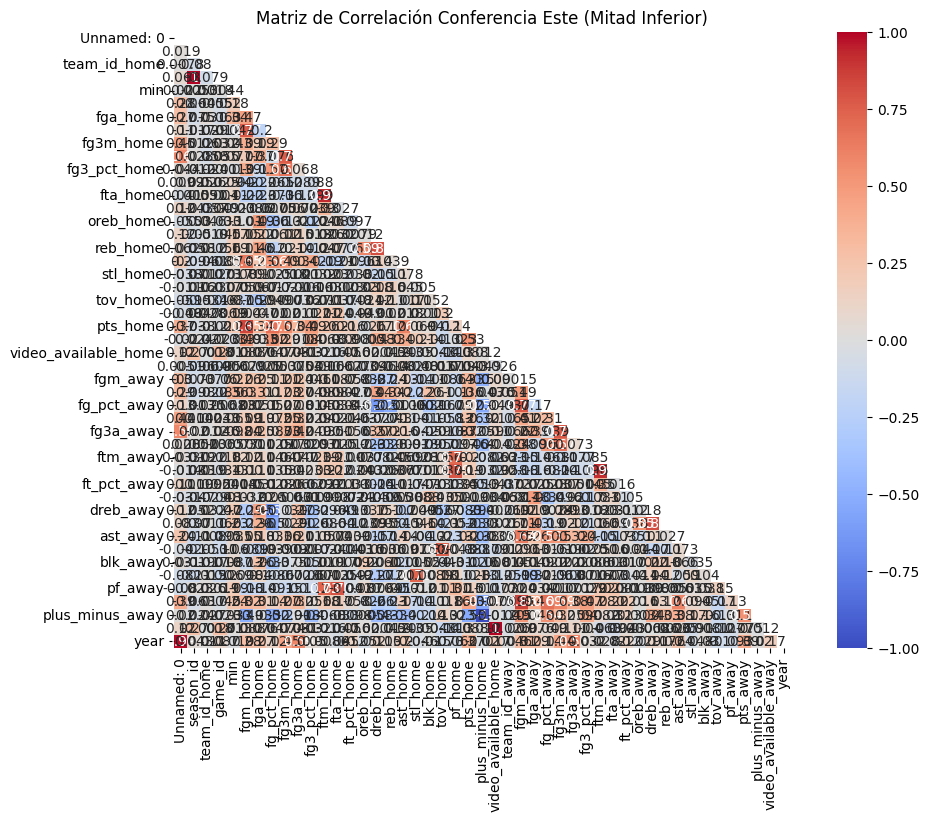

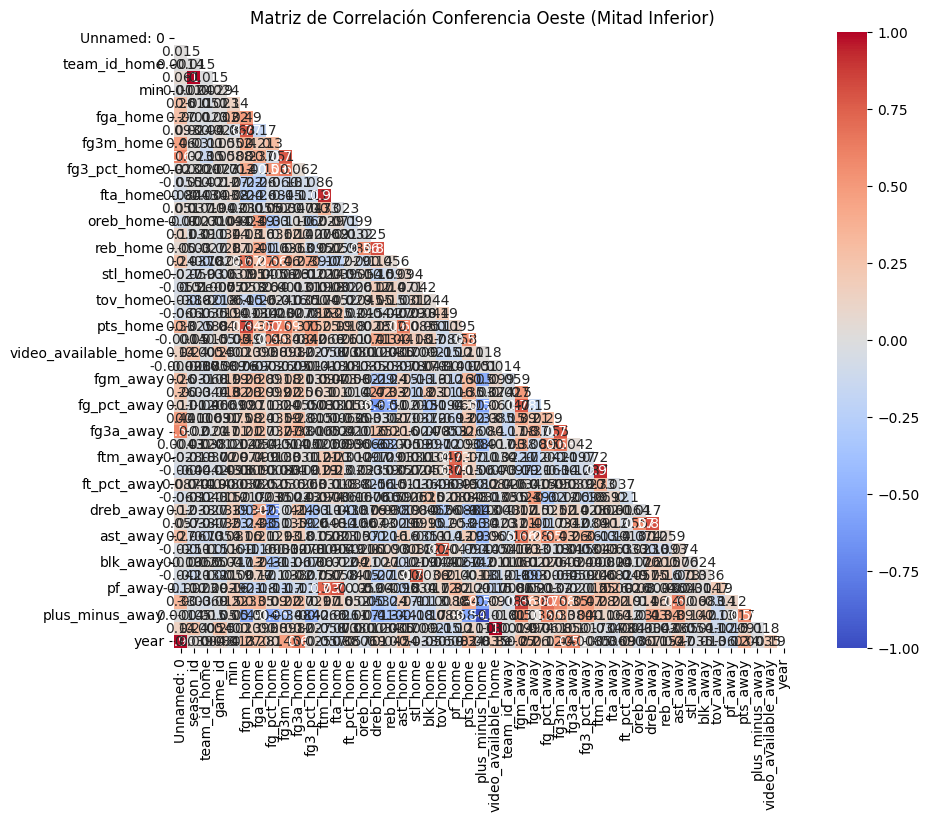

In [34]:
# Matriz de correlación -- VER SE VE MAL
# Filtrar datos por equipos de conferencias Este y Oeste
este_data = game_data[game_data['team_name_home'].isin(conferencia_este) & game_data['team_name_away'].isin(conferencia_este)]
oeste_data = game_data[game_data['team_name_home'].isin(conferencia_oeste) & game_data['team_name_away'].isin(conferencia_oeste)]

# Matriz de correlación para conferencia Este
este_numeric_columns = este_data.select_dtypes(include=['number'])
este_correlation_matrix = este_numeric_columns.corr()

# Matriz de correlación para conferencia Oeste
oeste_numeric_columns = oeste_data.select_dtypes(include=['number'])
oeste_correlation_matrix = oeste_numeric_columns.corr()

# Crear una máscara para la mitad superior
mask_este = np.triu(np.ones_like(este_correlation_matrix, dtype=bool))
mask_oeste = np.triu(np.ones_like(oeste_correlation_matrix, dtype=bool))

# Configurar el gráfico para conferencia Este
plt.figure(figsize=(12, 8))
sns.heatmap(este_correlation_matrix, mask=mask_este, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación Conferencia Este (Mitad Inferior)')
plt.show()

# Configurar el gráfico para conferencia Oeste
plt.figure(figsize=(12, 8))
sns.heatmap(oeste_correlation_matrix, mask=mask_oeste, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación Conferencia Oeste (Mitad Inferior)')
plt.show()

In [29]:
# Tablas cruzadas
cross_tab = pd.crosstab(game_data['team_abbreviation_home'], game_data['wl_home'])
print(cross_tab)


wl_home                   L    W
team_abbreviation_home          
ALB                       0    1
ATL                     192  260
BKN                     220  228
BOS                     181  307
CHA                     206  217
CHI                     214  234
CLE                     191  280
DAL                     195  249
DEN                     166  287
DET                     229  195
DRT                       2    0
EST                       4    0
FBU                       2    0
FCB                       1    0
FLA                       1    0
GNS                       3    0
GSW                     124  380
HOU                     182  287
IND                     179  270
LAC                     168  306
LAL                     251  218
LBN                       2    1
MEM                     175  283
MIA                     180  313
MIL                     178  286
MIN                     218  204
MLN                       1    0
NOP                     198  229
NYK       

### Interpretación de Tablas Cruzadas:

- **Abreviatura del Equipo:** Cada fila representa un equipo identificado por su abreviatura.
- **Victorias (W):** Número total de partidos ganados por cada equipo durante el período analizado.
- **Derrotas (L):** Número total de partidos perdidos por cada equipo durante el período analizado.

### Conclusiones:

#### Desempeño General:

- Equipos como los **Golden State Warriors (GSW)** y los **Boston Celtics (BOS)** muestran un alto número de victorias en comparación con las derrotas, indicando un desempeño sólido durante la temporada.
- Por otro lado, equipos como los **Sacramento Kings (SAC)** y los **New York Knicks (NYK)** muestran más derrotas que victorias, lo que sugiere desafíos en su desempeño durante la temporada.

#### Balance y Competitividad:

- Equipos con un balance cercano a igual número de victorias y derrotas, como los **Charlotte Hornets (CHA)** y los **Portland Trail Blazers (POR)**, pueden indicar una temporada competitiva con altibajos en su desempeño.

#### Equipos con Pocas Muestras:

- Algunas abreviaturas aparecen con muy pocos partidos jugados (como **RMD**, **UBB**, **MLN**, entre otros), lo que puede deberse a temporadas recientes o a equipos menos frecuentes en los datos analizados.

#### Variación en el Desempeño:

- Equipos con diferencias notables entre victorias y derrotas, como los **Los Angeles Lakers (LAL)** y los **Miami Heat (MIA)**, pueden haber experimentado fluctuaciones significativas en su desempeño a lo largo de la temporada.

#### Impacto en el Análisis:

- Esta tabla cruzada proporciona una visión clara del desempeño histórico de cada equipo en términos de victorias y derrotas, lo cual es fundamental para comprender patrones de desempeño y tomar decisiones estratégicas en el análisis de datos deportivos.


## EDA

<Figure size 1000x600 with 0 Axes>

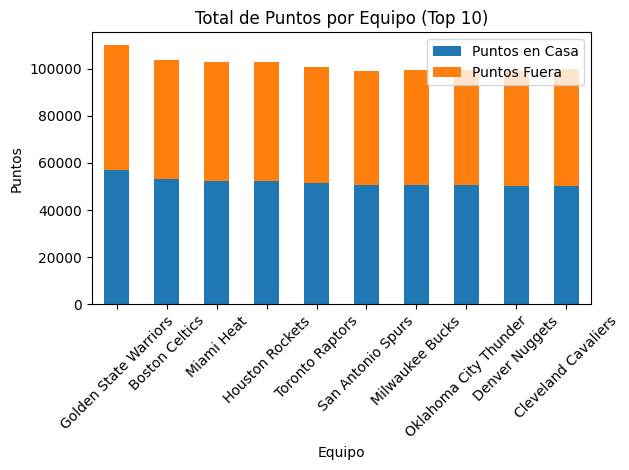

In [37]:
# Agrupación por equipo y suma de puntos en casa y fuera
# Total de puntos anotados por cada equipo en casa y fuera
points_by_team = game_data.groupby('team_name_home')[['pts_home', 'pts_away']].sum()
points_by_team = points_by_team.sort_values(by='pts_home', ascending=False).head(10)

plt.figure(figsize=(10, 6))
points_by_team.plot(kind='bar', stacked=True)
plt.title('Total de Puntos por Equipo (Top 10)')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=45)
plt.legend(['Puntos en Casa', 'Puntos Fuera'])
plt.tight_layout()
plt.show()

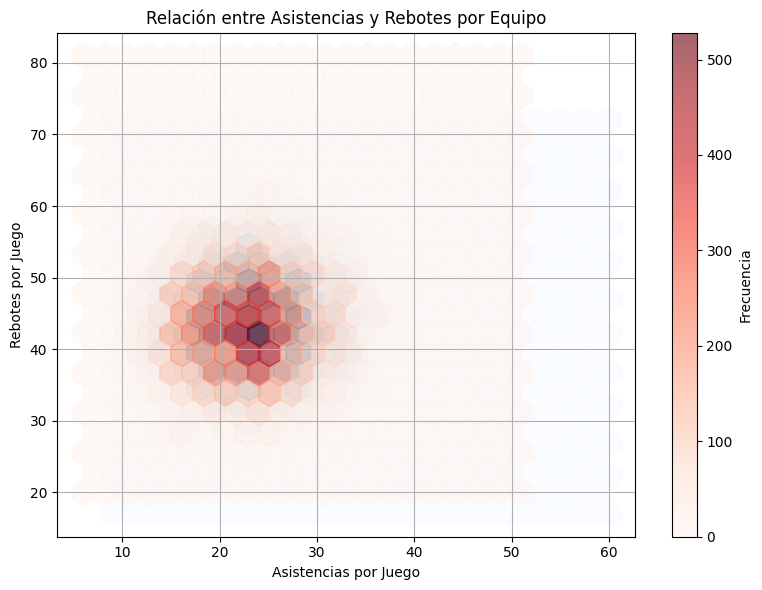

In [38]:
# Relación entre Asistencias y Rebotes por Equipo
plt.figure(figsize=(8, 6))
plt.hexbin(game_data['ast_home'], game_data['reb_home'], gridsize=20, cmap='Blues', alpha=0.6)
plt.hexbin(game_data['ast_away'], game_data['reb_away'], gridsize=20, cmap='Reds', alpha=0.6)
plt.colorbar(label='Frecuencia')
plt.title('Relación entre Asistencias y Rebotes por Equipo')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Rebotes por Juego')
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis del Gráfico

1. **Título del Gráfico**: "Relación entre Asistencias y Rebotes por Equipo"
   - Este título indica que el gráfico muestra la relación entre la cantidad de asistencias y rebotes por partido de diferentes equipos.

2. **Ejes**:
   - **Eje X**: "Asistencias por Juego"
     - Representa la cantidad de asistencias por partido.
   - **Eje Y**: "Rebotes por Juego"
     - Representa la cantidad de rebotes por partido.

3. **Tipo de Gráfico**:
   - Es un gráfico de tipo "hexbin" (hexágonos binarios), que se utiliza para visualizar la densidad de puntos en una gráfica de dispersión. En este caso, cada hexágono representa una región con un número determinado de puntos (partidos con un cierto número de asistencias y rebotes).

4. **Colores**:
   - El gráfico utiliza un mapa de colores ("cmap") con tonos que van de azul a rojo.
   - Los colores más oscuros indican una mayor densidad de puntos, es decir, un mayor número de partidos que caen dentro de ese rango específico de asistencias y rebotes.

5. **Frecuencia**:
   - A la derecha del gráfico hay una barra de color que indica la "Frecuencia". Esto muestra cuántos partidos tienen un cierto número de asistencias y rebotes. Los colores más oscuros (hacia el rojo) indican una mayor frecuencia de partidos en esa región del gráfico.

6. **Observaciones**:
   - La mayoría de los puntos se concentran en la parte baja izquierda del gráfico, lo que sugiere que la mayoría de los equipos tienen entre 0 y 30 asistencias por partido y entre 0 y 60 rebotes por partido.
   - Hay una densidad notablemente alta en la región donde los equipos promedian alrededor de 10-20 asistencias y 30-50 rebotes por partido, lo cual se indica por los hexágonos más oscuros.

### Conclusiones

- La mayoría de los equipos en el análisis tienden a tener un rendimiento similar en términos de asistencias y rebotes por partido.
- Hay una correlación visible entre un rango específico de asistencias y rebotes, lo que podría ser útil para identificar patrones o tendencias en el rendimiento de los equipos.
- La densidad de puntos en ciertas áreas del gráfico puede ayudar a enfocar el análisis en esos rangos específicos de asistencias y rebotes para un estudio más detallado.

Este tipo de gráfico es útil para entender cómo se distribuyen las asistencias y rebotes por partido en una liga o entre equipos específicos, y puede servir como base para análisis más profundos de desempeño y estrategia.


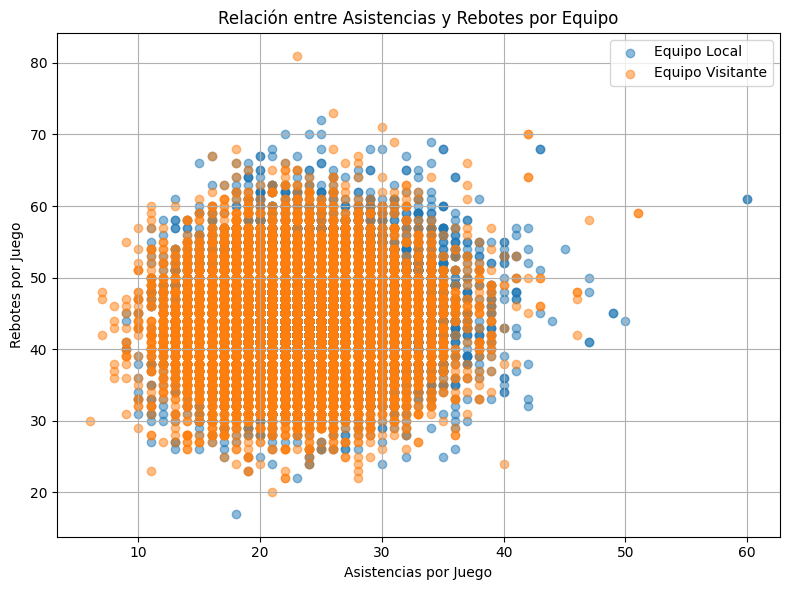

In [39]:
# Relación entre Asistencias y Rebotes por Equipo
plt.figure(figsize=(8, 6))
plt.scatter(game_data['ast_home'], game_data['reb_home'], alpha=0.5, label='Equipo Local')
plt.scatter(game_data['ast_away'], game_data['reb_away'], alpha=0.5, label='Equipo Visitante')
plt.title('Relación entre Asistencias y Rebotes por Equipo')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Rebotes por Juego')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_10320\3019741557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_este['game_date'] = pd.to_datetime(game_data_este['game_date'])
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_10320\3019741557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_oeste['game_date'] = pd.to_datetime(game_data_oeste['game_date'])
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_10320\3019741557.py:11: SettingWithCopyWarning: 
A value

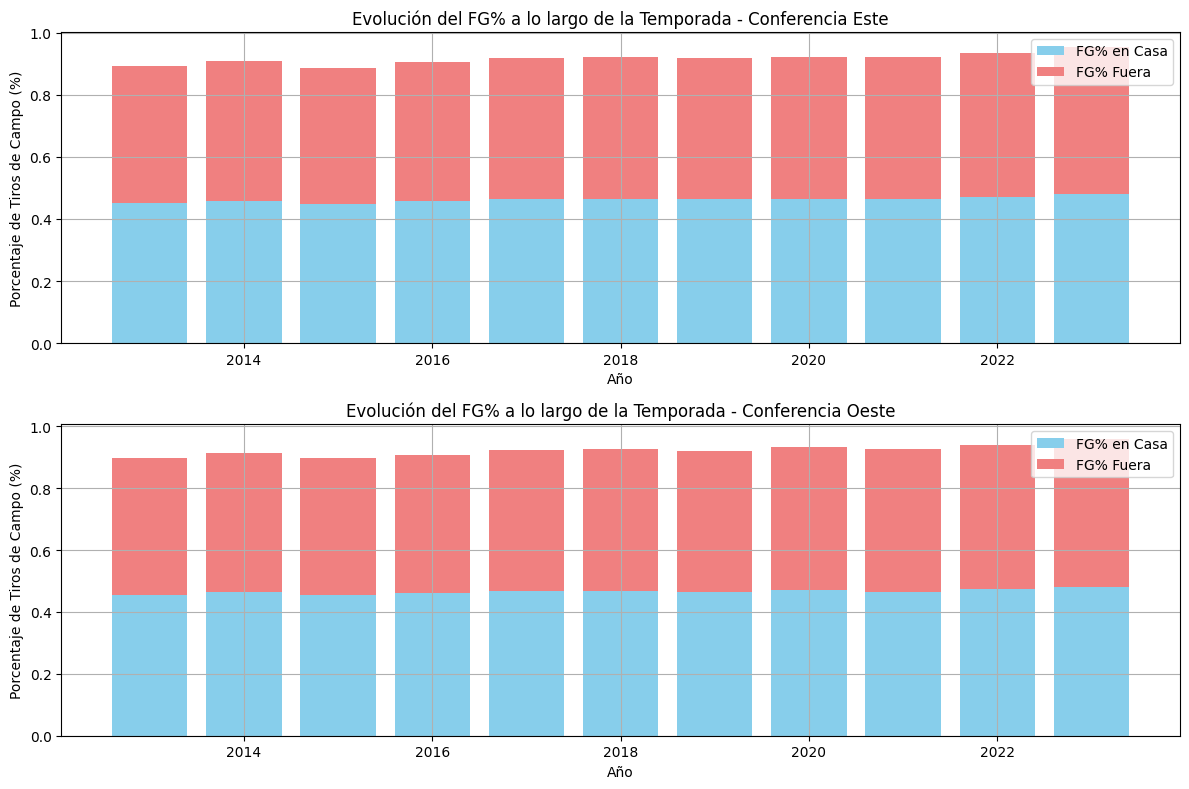

In [40]:
# Evolución del FG% a lo largo de la Temporada 
# Filtrar los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Convertir la columna game_date a tipo datetime para poder trabajar con años
game_data_este['game_date'] = pd.to_datetime(game_data_este['game_date'])
game_data_oeste['game_date'] = pd.to_datetime(game_data_oeste['game_date'])

# Extraer el año de la fecha del juego
game_data_este['year'] = game_data_este['game_date'].dt.year
game_data_oeste['year'] = game_data_oeste['game_date'].dt.year

# Calcular el promedio del porcentaje de tiros de campo por año para cada conferencia
fg_pct_over_time_este = game_data_este.groupby(['year'])[['fg_pct_home', 'fg_pct_away']].mean().reset_index()
fg_pct_over_time_oeste = game_data_oeste.groupby(['year'])[['fg_pct_home', 'fg_pct_away']].mean().reset_index()

# Crear gráficos de barras apiladas por conferencia y año
plt.figure(figsize=(12, 8))

# Gráfico para la conferencia Este
plt.subplot(2, 1, 1)
plt.bar(fg_pct_over_time_este['year'], fg_pct_over_time_este['fg_pct_home'], label='FG% en Casa', color='skyblue')
plt.bar(fg_pct_over_time_este['year'], fg_pct_over_time_este['fg_pct_away'], bottom=fg_pct_over_time_este['fg_pct_home'], label='FG% Fuera', color='lightcoral')
plt.title('Evolución del FG% a lo largo de la Temporada - Conferencia Este')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Tiros de Campo (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Gráfico para la conferencia Oeste
plt.subplot(2, 1, 2)
plt.bar(fg_pct_over_time_oeste['year'], fg_pct_over_time_oeste['fg_pct_home'], label='FG% en Casa', color='skyblue')
plt.bar(fg_pct_over_time_oeste['year'], fg_pct_over_time_oeste['fg_pct_away'], bottom=fg_pct_over_time_oeste['fg_pct_home'], label='FG% Fuera', color='lightcoral')
plt.title('Evolución del FG% a lo largo de la Temporada - Conferencia Oeste')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Tiros de Campo (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar los gráficos
plt.show()



C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\1727937968.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación
C:\Users\Personal Computer\AppData\Local\Temp\ipykernel_12884\1727937968.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación


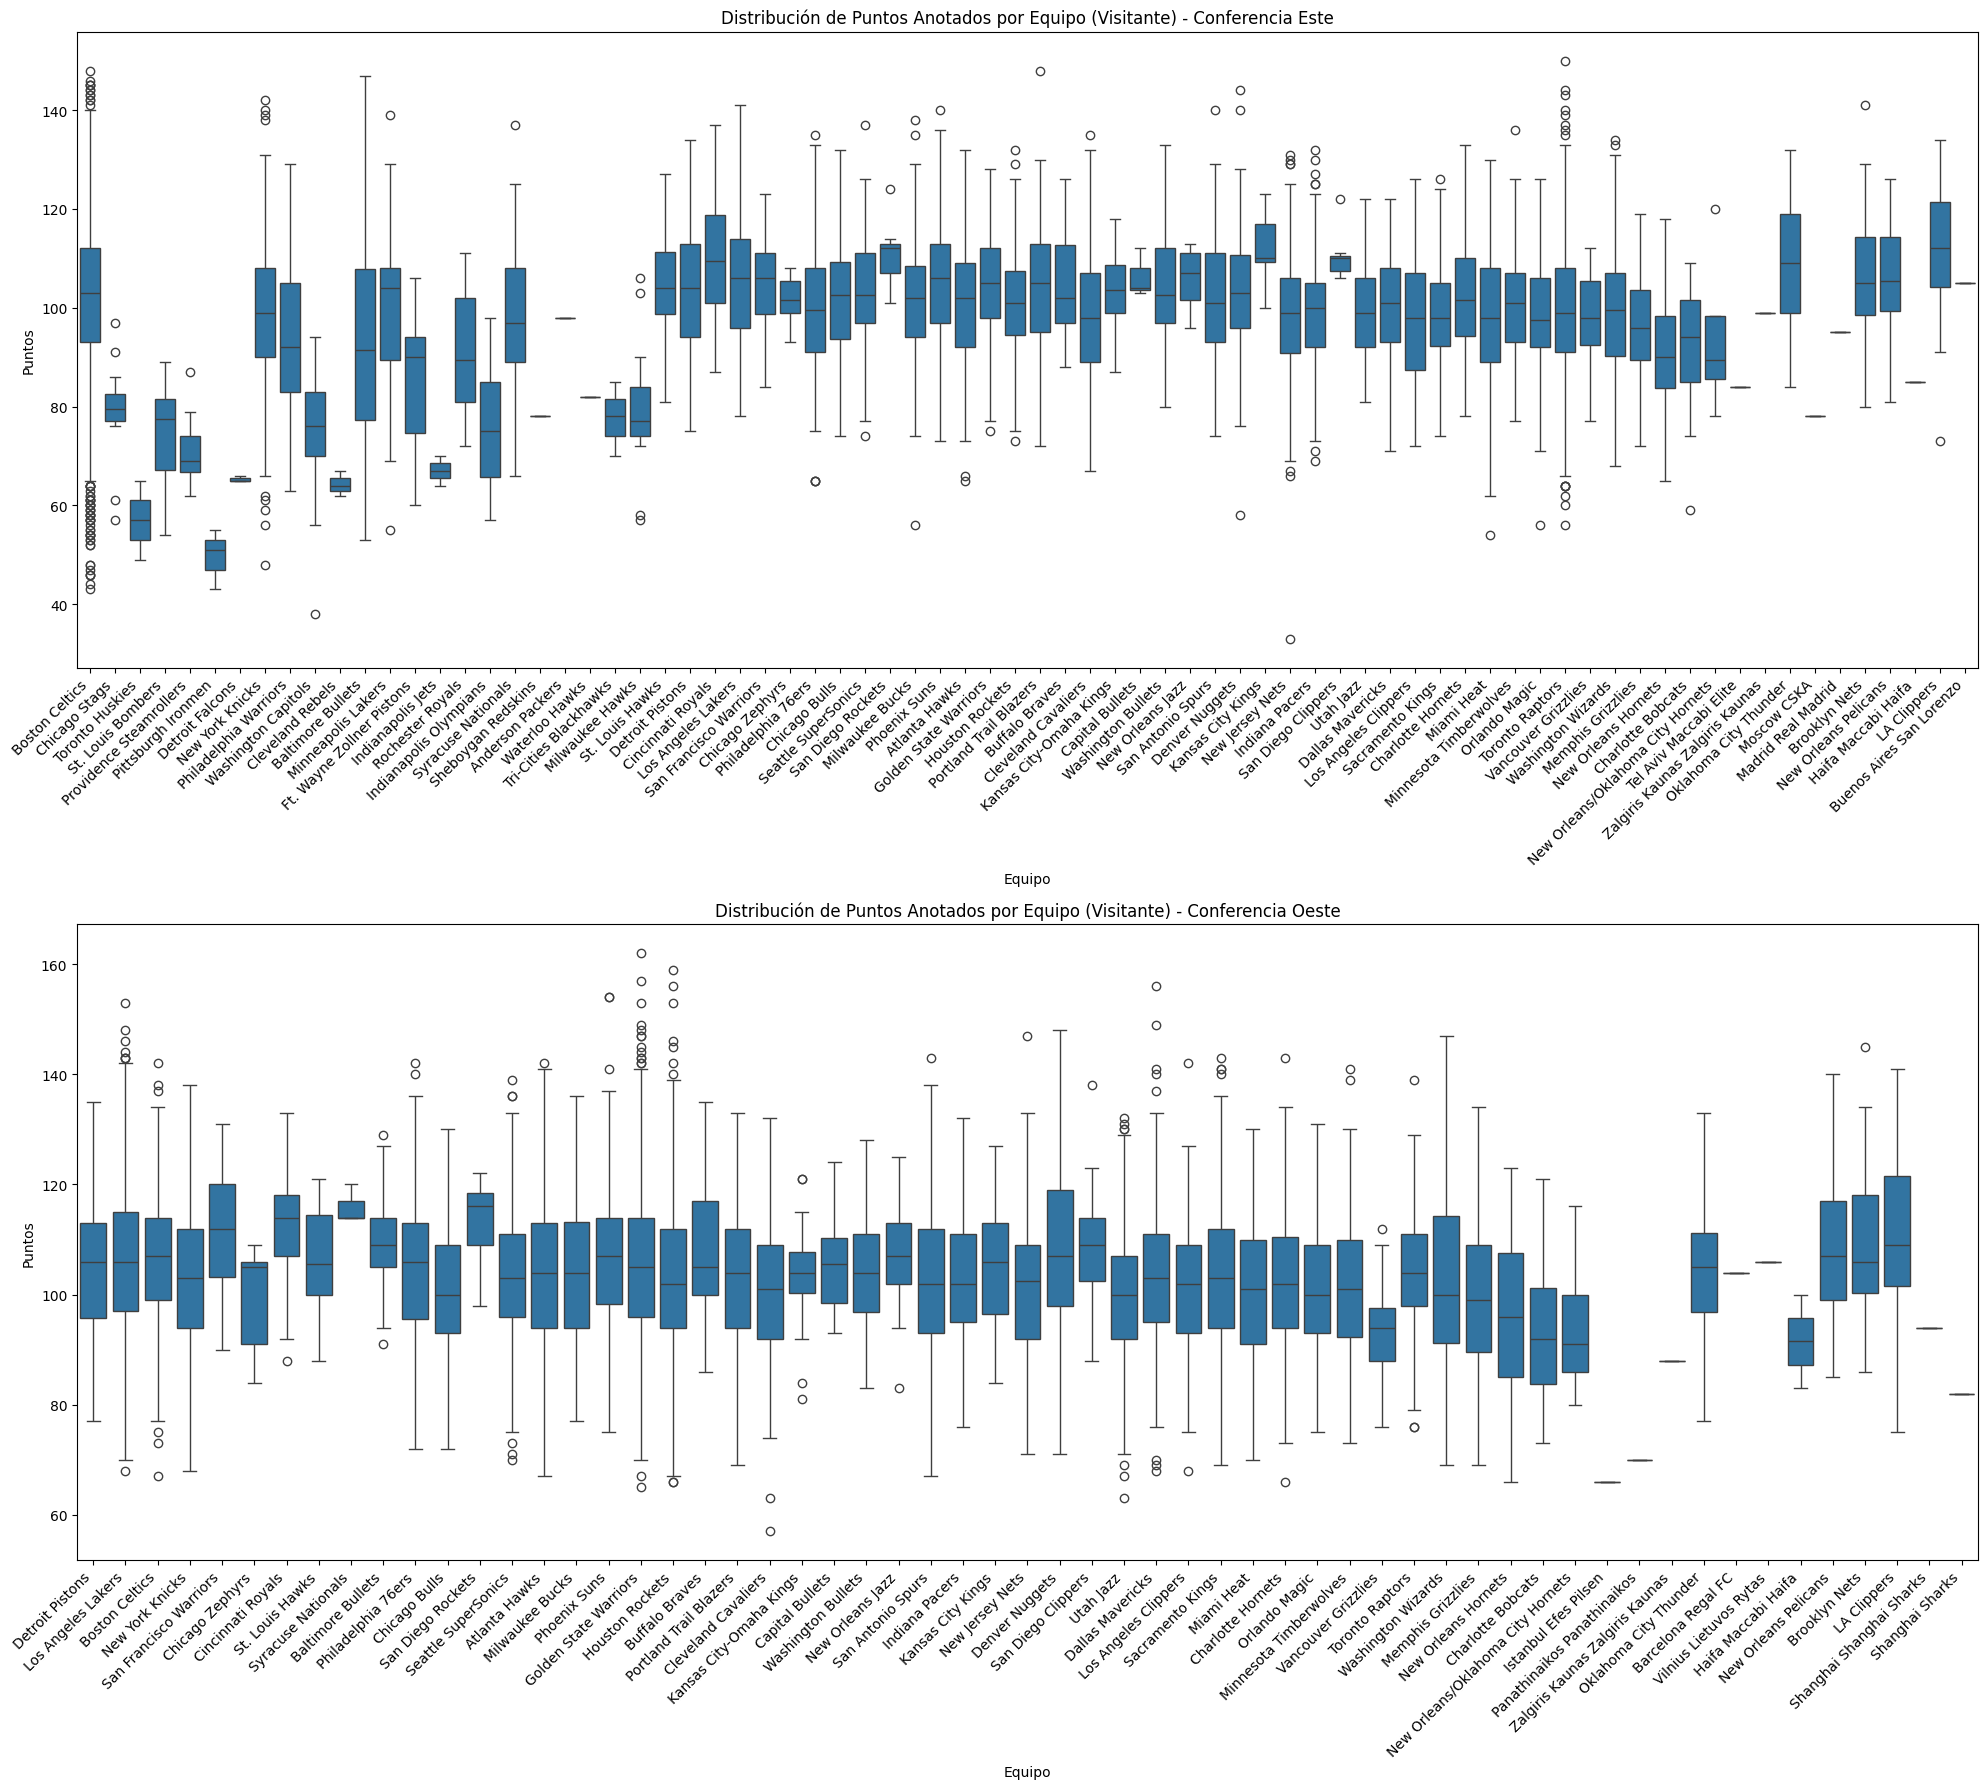

In [152]:
# Distribución de Puntos Anotados por Equipo (Visitante) - por Conferencias
# Filtramos los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Creamos la figura y los subplots con un tamaño más grande
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))

# Gráfico de caja para conferencia Este
sns.boxplot(x='team_name_away', y='pts_away', data=game_data_este, ax=ax1)
ax1.set_title('Distribución de Puntos Anotados por Equipo (Visitante) - Conferencia Este')
ax1.set_xlabel('Equipo')
ax1.set_ylabel('Puntos')
ax1.tick_params(axis='x', rotation=45)  # Rotación de etiquetas
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación

# Gráfico de caja para conferencia Oeste
sns.boxplot(x='team_name_away', y='pts_away', data=game_data_oeste, ax=ax2)
ax2.set_title('Distribución de Puntos Anotados por Equipo (Visitante) - Conferencia Oeste')
ax2.set_xlabel('Equipo')
ax2.set_ylabel('Puntos')
ax2.tick_params(axis='x', rotation=45)  # Rotación de etiquetas
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Ajuste adicional de rotación y alineación

# Ajustamos el espaciado entre los subplots
plt.tight_layout()

# Mostramos los gráficos
plt.show()


### Gráfico de Distribución de Puntos Anotados por Equipo (Visitante)

#### Descripción
El gráfico está dividido en dos partes:

- **Conferencia Este**: Muestra la distribución de puntos anotados por cada equipo visitante en la Conferencia Este.
- **Conferencia Oeste**: Muestra la misma distribución pero para los equipos de la Conferencia Oeste.

Cada caja en los gráficos de cajas y bigotes (boxplot) representa la distribución de puntos anotados por un equipo, donde:
- La línea central de la caja indica la mediana.
- Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3).
- Las "bigotes" (líneas que se extienden desde la caja) muestran la variabilidad fuera de los cuartiles, y los puntos fuera de estos bigotes se consideran valores atípicos.

#### Observaciones
**Variabilidad en la Conferencia Este**:
- Algunos equipos, como los Detroit Pistons y los Orlando Magic, muestran una gran variabilidad en los puntos anotados.
- Equipos como los Boston Celtics y los Milwaukee Bucks tienen una distribución más estrecha, indicando mayor consistencia en sus puntos anotados como visitantes.

**Variabilidad en la Conferencia Oeste**:
- Equipos como los Los Angeles Lakers y los Phoenix Suns muestran una variabilidad considerable en los puntos anotados.
- Otros equipos, como los Dallas Mavericks y los Golden State Warriors, tienen distribuciones más consistentes.

**Valores Atípicos**:
- Hay varios puntos fuera de los bigotes en ambos gráficos, indicando juegos donde los equipos anotaron significativamente más o menos de lo esperado.

**Medianas**:
- La mayoría de los equipos en ambas conferencias tienen medianas que oscilan entre 100 y 110 puntos, lo cual sugiere que este es el rango típico de puntos anotados por los equipos visitantes.

### Conclusiones Generales
**Consistencia en Equipos de Conferencia Este**: Algunos equipos de la Conferencia Este, como los Boston Celtics y los Milwaukee Bucks, muestran una mayor consistencia en sus puntuaciones como visitantes en comparación con otros equipos de la misma conferencia.

**Variabilidad en la Conferencia Oeste**: La Conferencia Oeste muestra una mayor variabilidad entre sus equipos. Equipos como los Los Angeles Lakers y los Phoenix Suns tienen una mayor dispersión en los puntos anotados.

**Rango Típico de Puntos Anotados**: La mediana de puntos anotados por equipos visitantes en ambas conferencias generalmente está entre 100 y 110 puntos, lo que indica que este es el rendimiento ofensivo esperado.

**Valores Atípicos Frecuentes**: La presencia de varios valores atípicos en ambos gráficos sugiere que hay ocasiones en las que los equipos tienen rendimientos ofensivos significativamente diferentes de lo normal, posiblemente debido a factores como la calidad del oponente, lesiones, o estrategias específicas del juego.


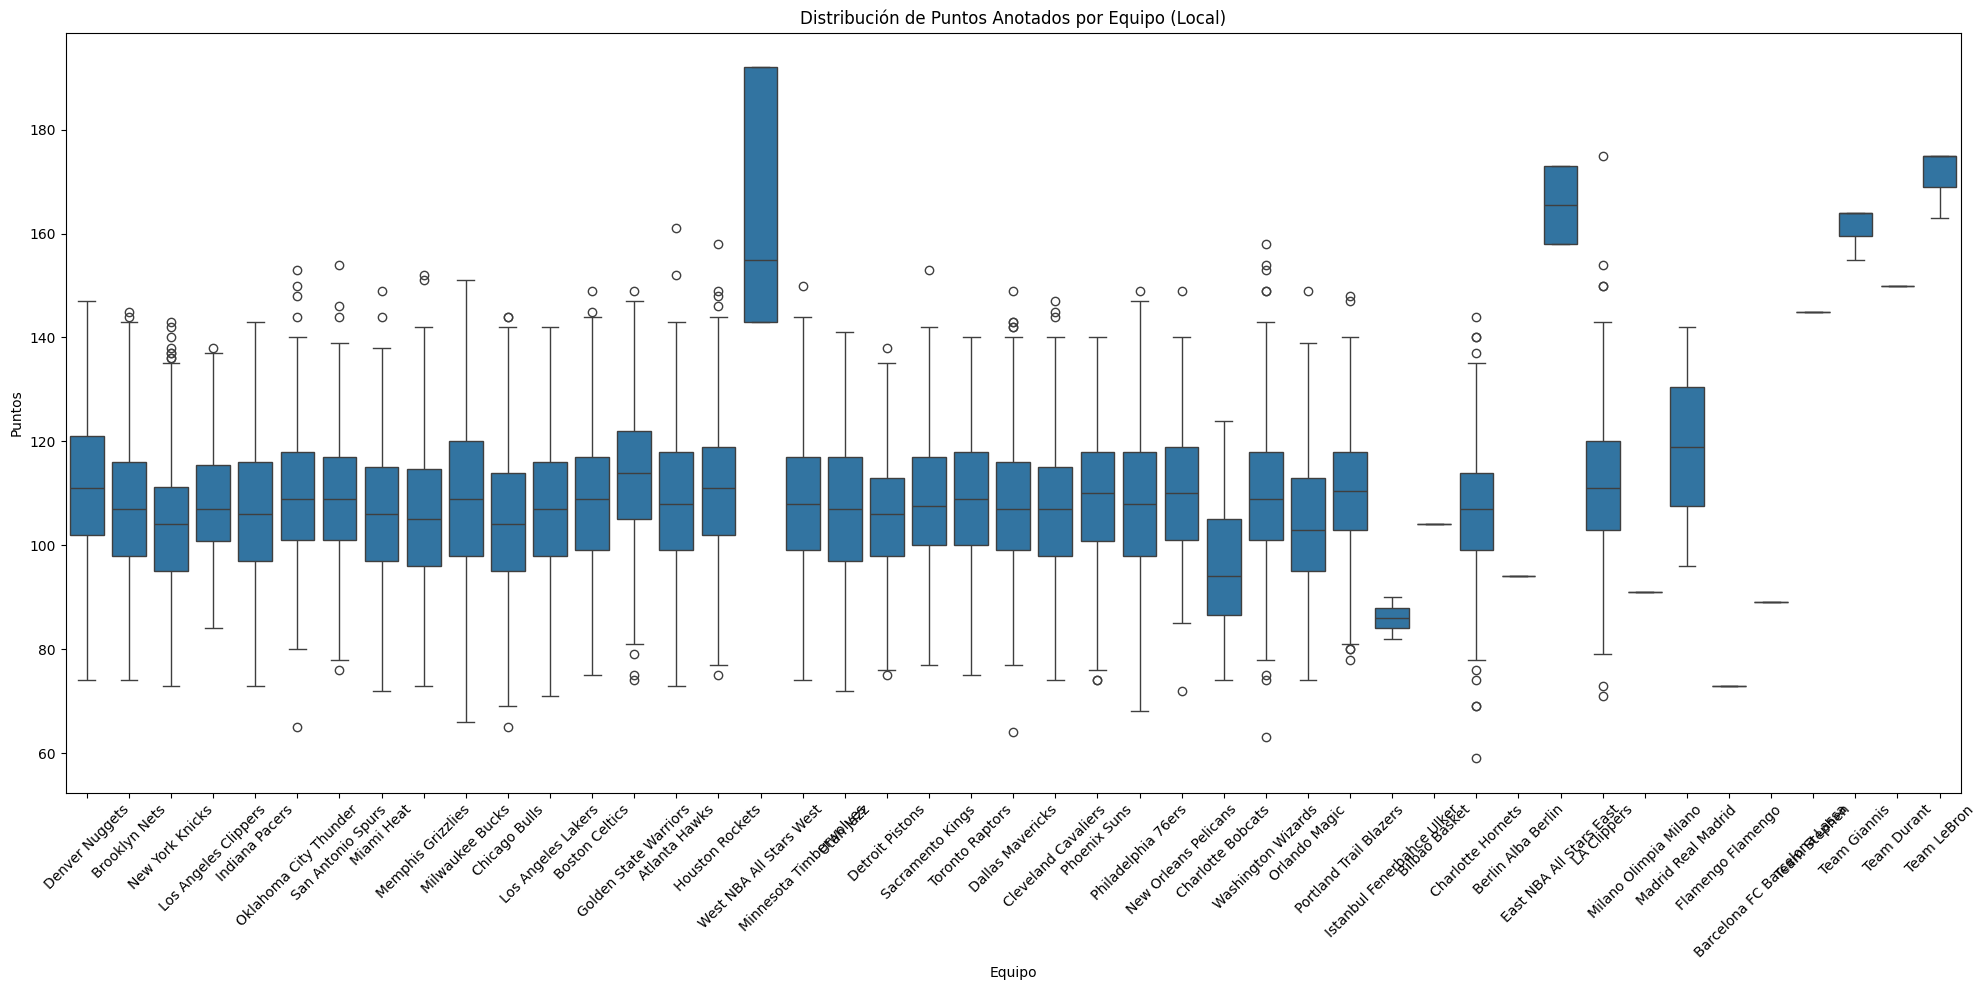

In [41]:
# Distribución de Puntos Anotados por Equipo (Local)
plt.figure(figsize=(20, 10))
sns.boxplot(x='team_name_home', y='pts_home', data=game_data)
plt.title('Distribución de Puntos Anotados por Equipo (Local)')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribución de las asistencias por conferencia

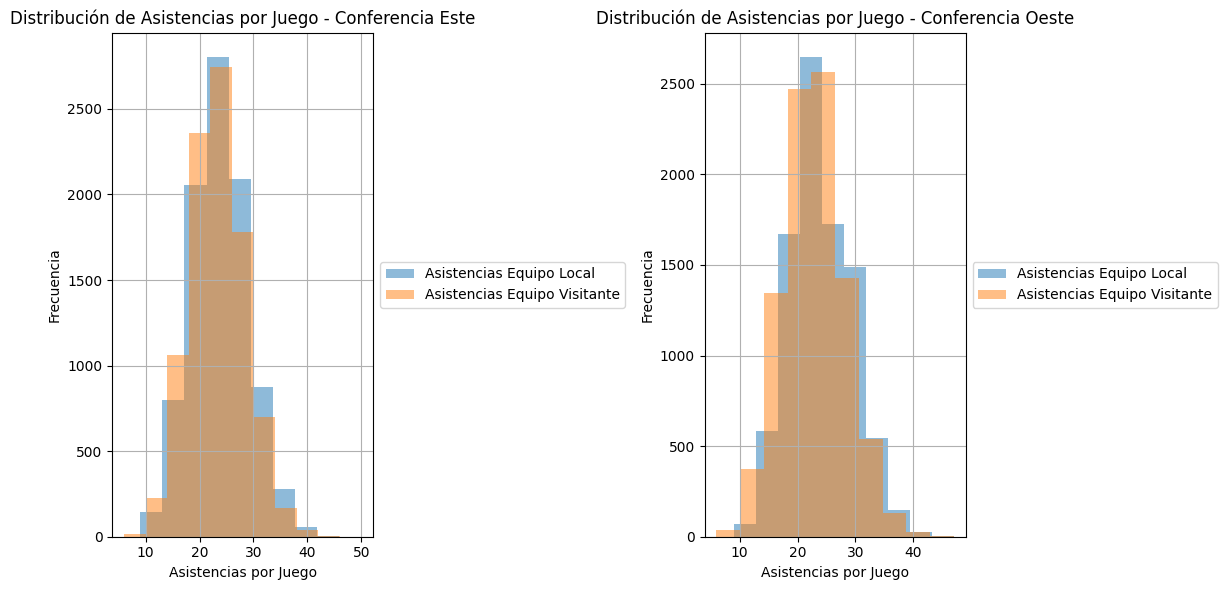

In [43]:
# Filtramos los datos por conferencia Este y Oeste
game_data_este = game_data[(game_data['team_name_home'].isin(conferencia_este)) | (game_data['team_name_away'].isin(conferencia_este))]
game_data_oeste = game_data[(game_data['team_name_home'].isin(conferencia_oeste)) | (game_data['team_name_away'].isin(conferencia_oeste))]

# Creamos el gráfico de distribución de las asistencias por conferencia
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(game_data_este['ast_home'], bins=10, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data_este['ast_away'], bins=10, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego - Conferencia Este')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda a la derecha del gráfico
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(game_data_oeste['ast_home'], bins=10, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data_oeste['ast_away'], bins=10, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego - Conferencia Oeste')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda a la derecha del gráfico
plt.grid(True)

plt.tight_layout()
plt.show()


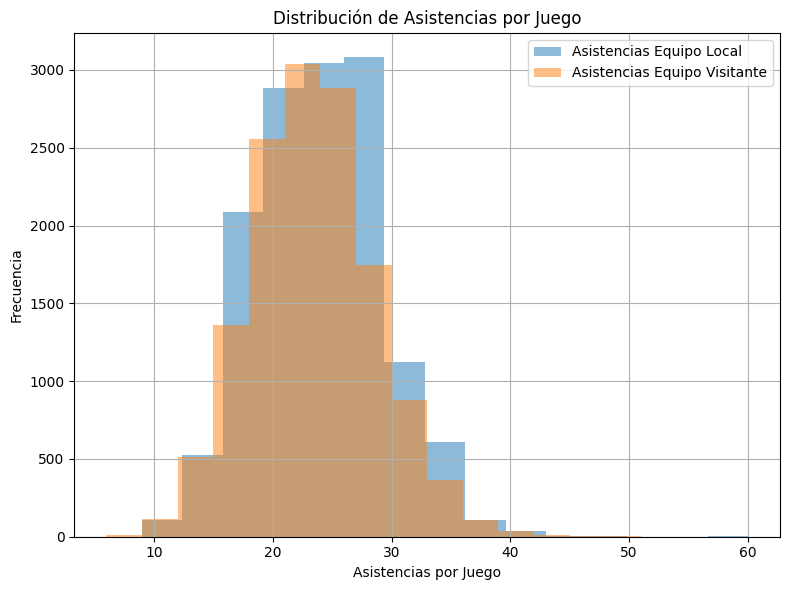

In [44]:
# Distribución de Asistencias por Juego
plt.figure(figsize=(8, 6))
plt.hist(game_data['ast_home'], bins=15, alpha=0.5, label='Asistencias Equipo Local')
plt.hist(game_data['ast_away'], bins=15, alpha=0.5, label='Asistencias Equipo Visitante')
plt.title('Distribución de Asistencias por Juego')
plt.xlabel('Asistencias por Juego')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Matriz de Correlación 

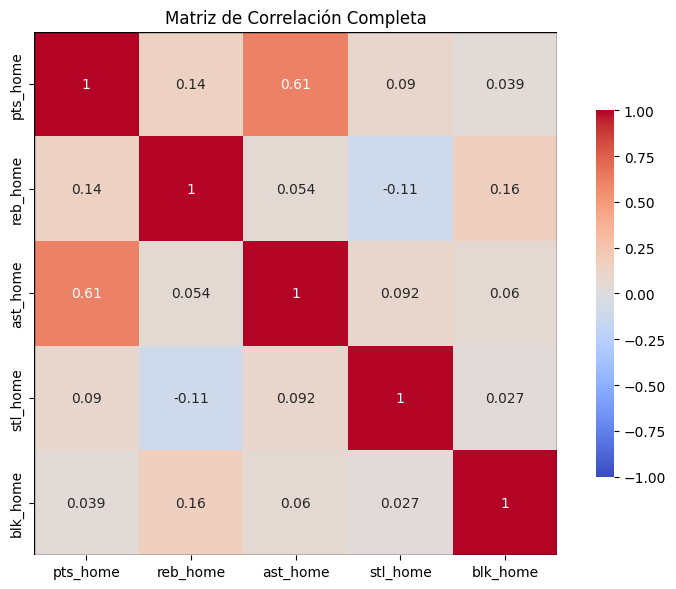

In [63]:
# Matriz de Correlación

# Calcular matriz de correlación
correlation_matrix = game_data[['pts_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home']].corr()

# Crear figura y establecer tamaño
plt.figure(figsize=(8, 6))

# Generar heatmap con la diagonal y ambas mitades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .7})

# Añadir línea para mostrar la diagonal
plt.axhline(y=0, color='k',linewidth=1)
plt.axhline(y=correlation_matrix.shape[0], color='k',linewidth=1)
plt.axvline(x=0, color='k',linewidth=1)
plt.axvline(x=correlation_matrix.shape[1], color='k',linewidth=1)

# Añadir título y ajustar diseño
plt.title('Matriz de Correlación Completa')
plt.tight_layout()

# Mostrar gráfico
plt.show()



Distribución de Puntos Anotados por Resultado en Casa

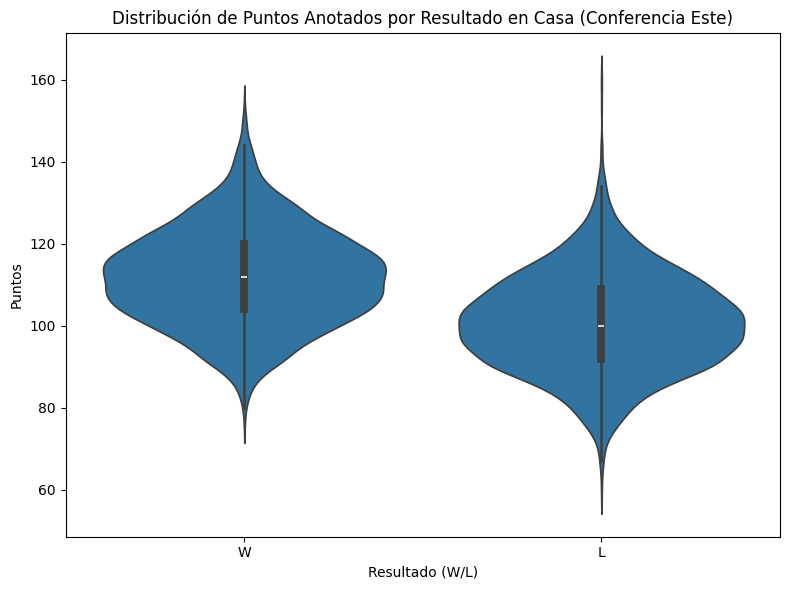

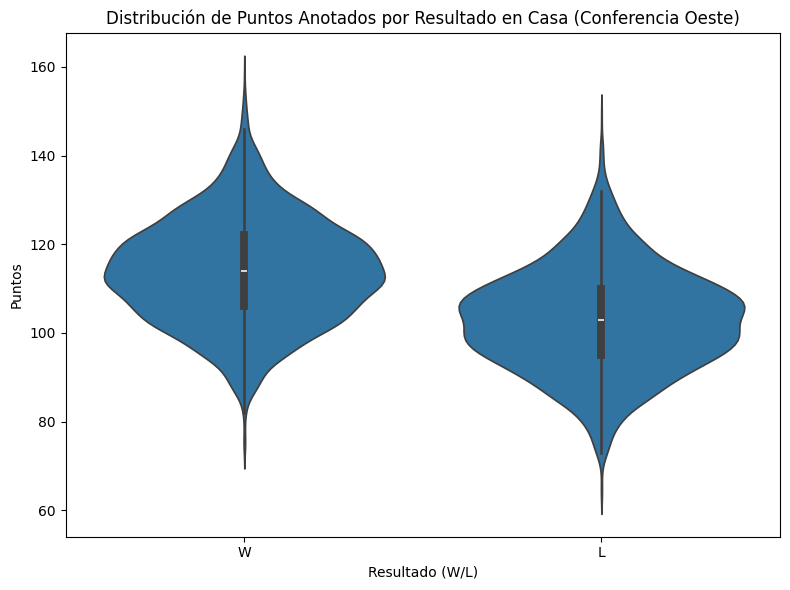

In [46]:
# Filtrar los datos por conferencia Este
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Gráfico de violín para la conferencia Este
plt.figure(figsize=(8, 6))
sns.violinplot(x='wl_home', y='pts_home', data=game_data_este)
plt.title('Distribución de Puntos Anotados por Resultado en Casa (Conferencia Este)')
plt.xlabel('Resultado (W/L)')
plt.ylabel('Puntos')
plt.tight_layout()
plt.show()

# Gráfico de violín para la conferencia Oeste
plt.figure(figsize=(8, 6))
sns.violinplot(x='wl_home', y='pts_home', data=game_data_oeste)
plt.title('Distribución de Puntos Anotados por Resultado en Casa (Conferencia Oeste)')
plt.xlabel('Resultado (W/L)')
plt.ylabel('Puntos')
plt.tight_layout()
plt.show()


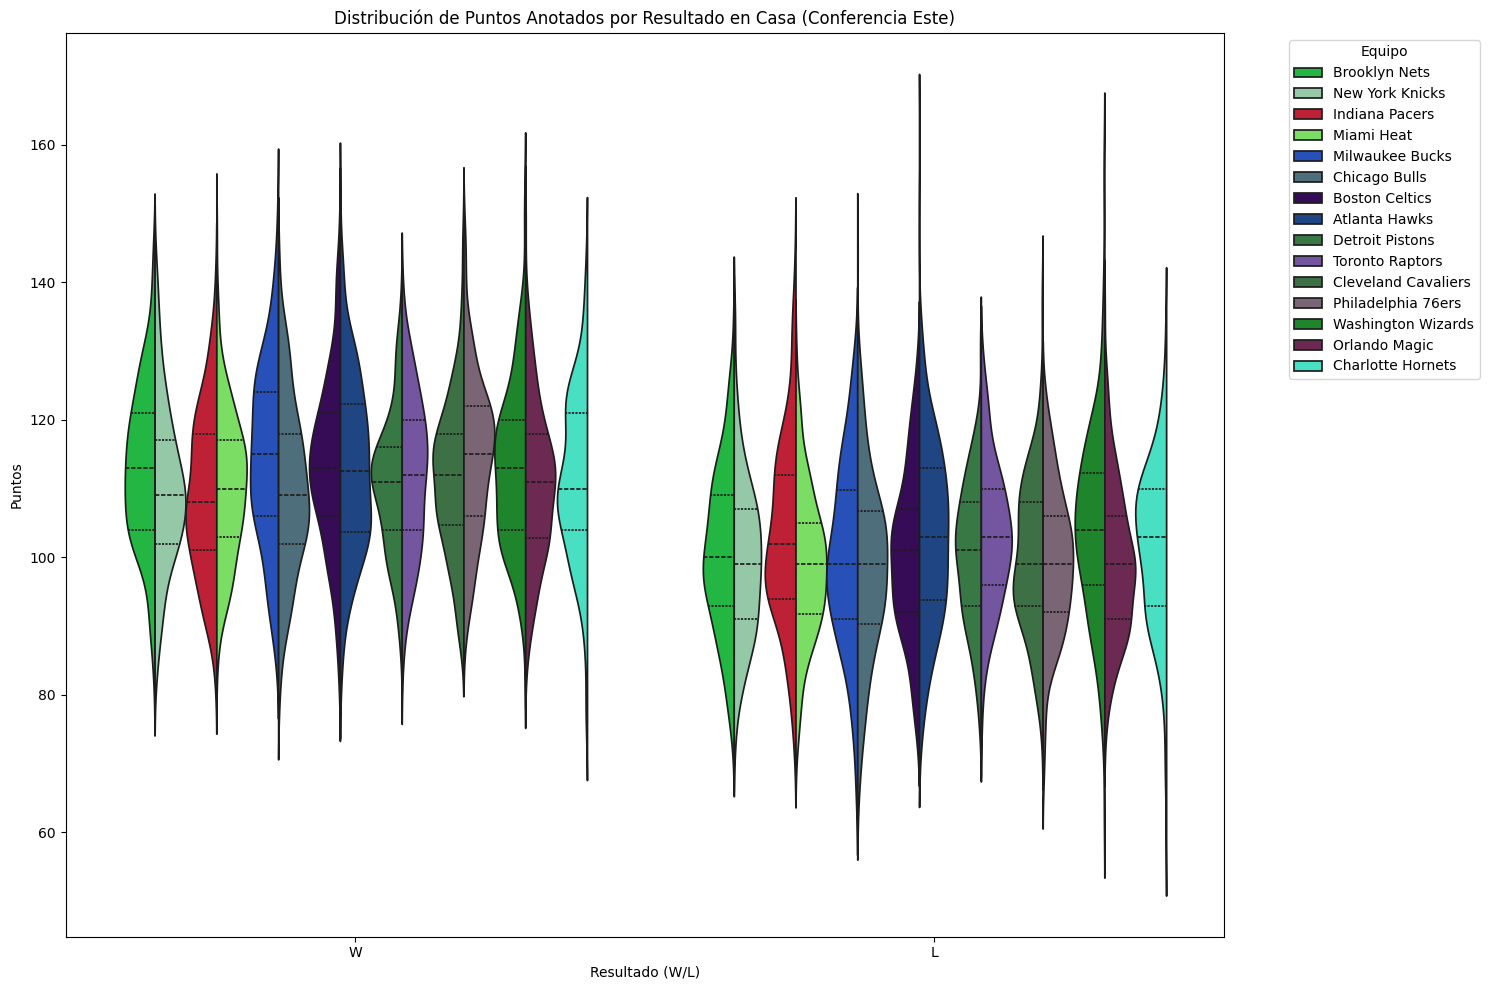

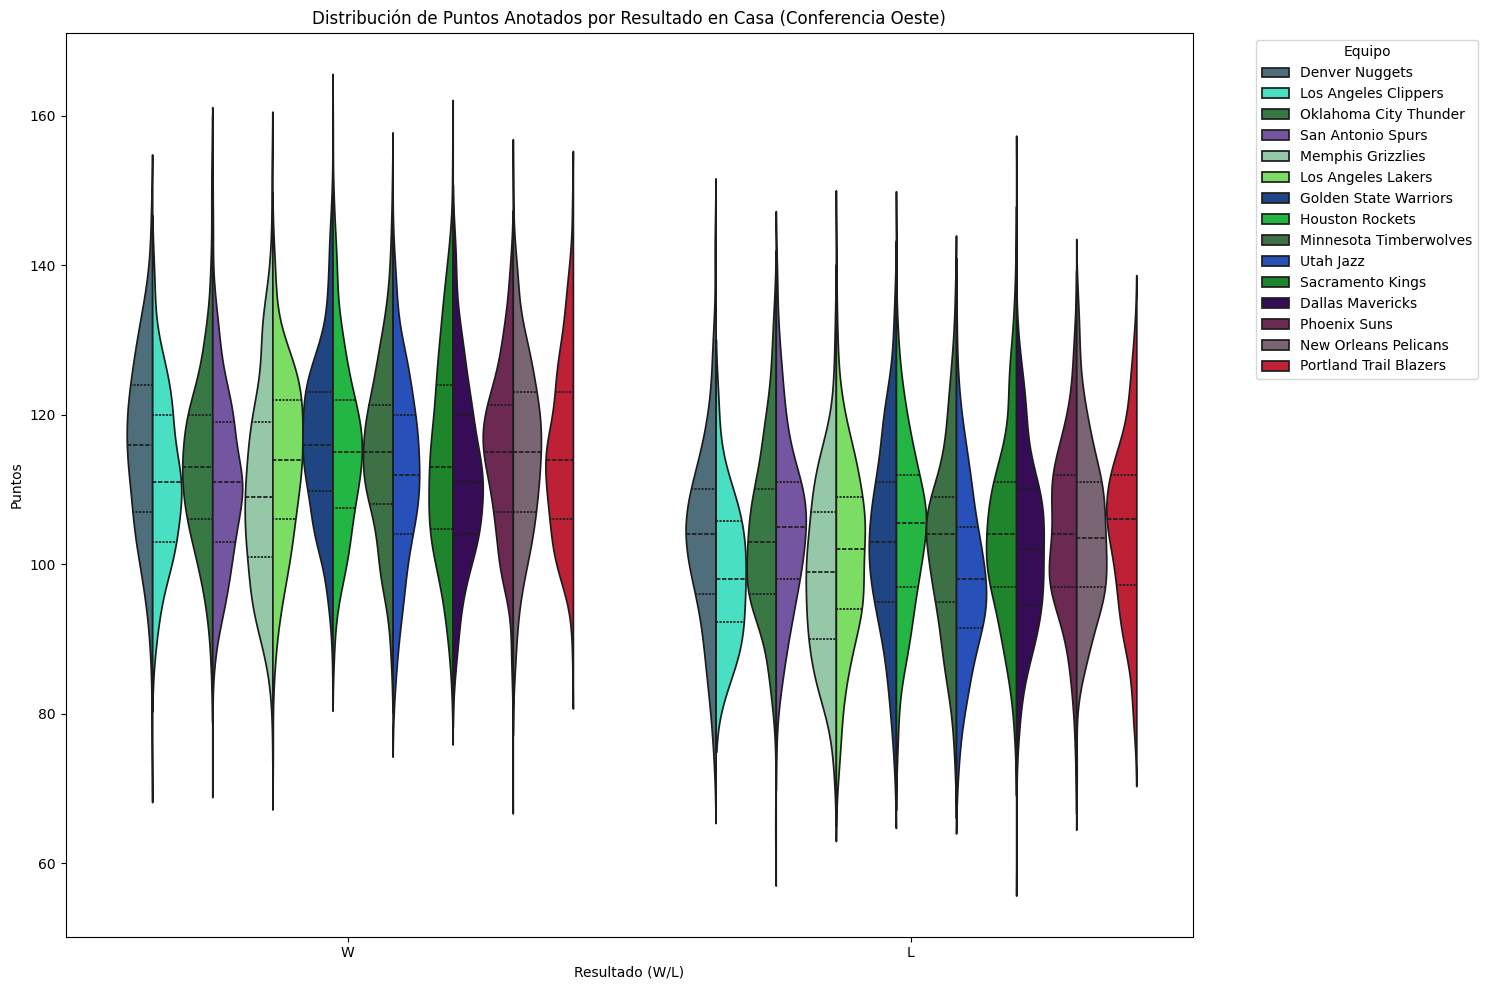

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

# Función para generar colores aleatorios para los equipos
def get_random_color_palette(teams):
    random.seed(42)  # Fijar la semilla para reproducibilidad
    colors = ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in range(len(teams))]
    return dict(zip(teams, colors))

# Asignar colores aleatorios a los equipos
team_colors_este = get_random_color_palette(conferencia_este)
team_colors_oeste = get_random_color_palette(conferencia_oeste)

# Filtrar datos por conferencias
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Asignar una paleta de colores para los resultados de los juegos
wl_palette = {'W': 'blue', 'L': 'red'}

# Función para graficar diagrama de violín con colores aleatorios por equipo y resultados de los juegos
def plot_violin_by_team_conference(data, team_colors, title):
    plt.figure(figsize=(15, 10))
    sns.violinplot(x='wl_home', y='pts_home', hue='team_name_home', data=data, split=True, inner="quart", palette=team_colors)
    plt.title(title)
    plt.xlabel('Resultado (W/L)')
    plt.ylabel('Puntos')
    plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Graficar diagrama de violín para la conferencia Este
plot_violin_by_team_conference(game_data_este, team_colors_este, 'Distribución de Puntos Anotados por Resultado en Casa (Conferencia Este)')

# Graficar diagrama de violín para la conferencia Oeste
plot_violin_by_team_conference(game_data_oeste, team_colors_oeste, 'Distribución de Puntos Anotados por Resultado en Casa (Conferencia Oeste)')



Por equipos y por conferencias

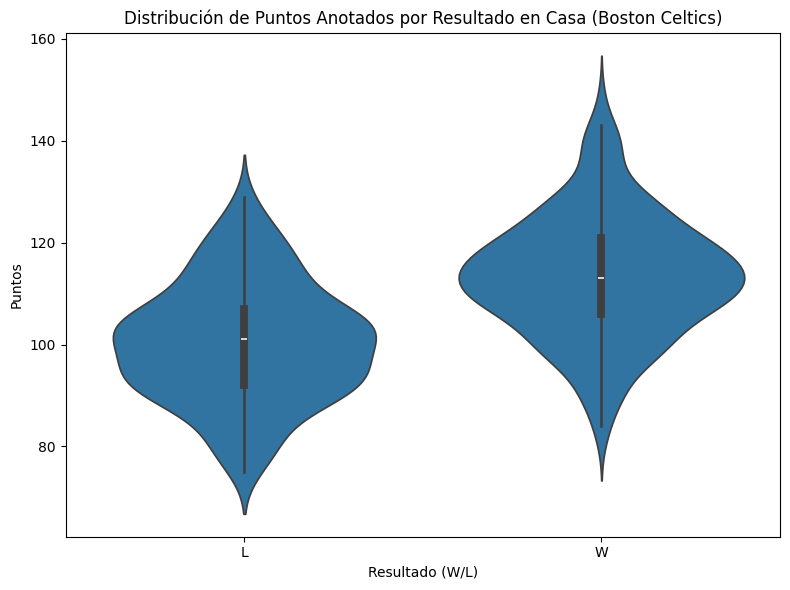

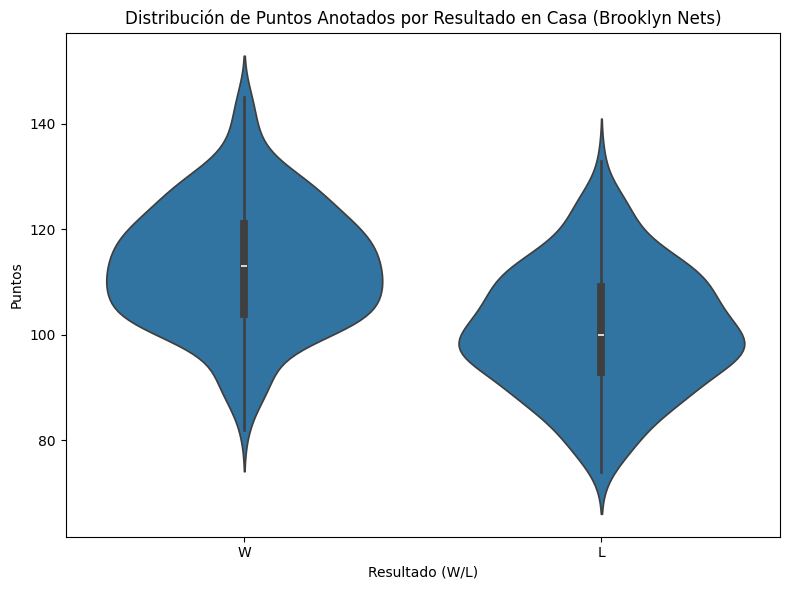

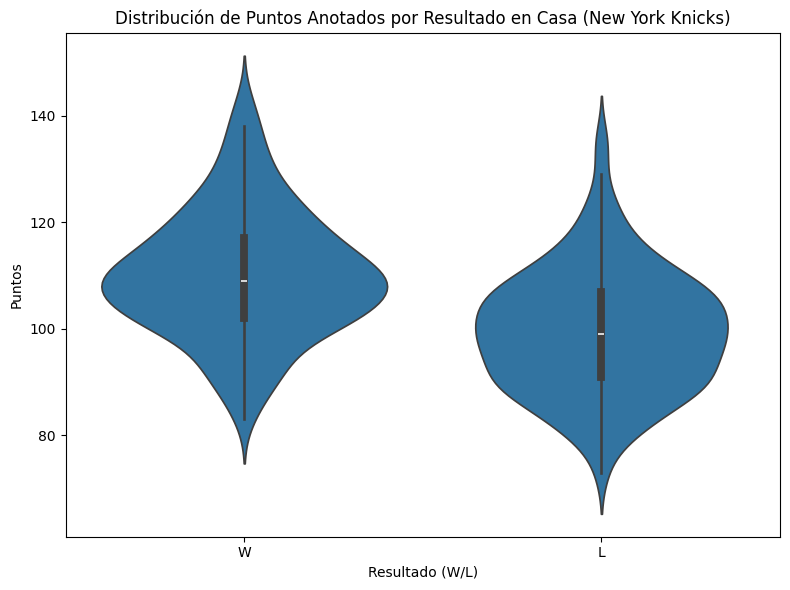

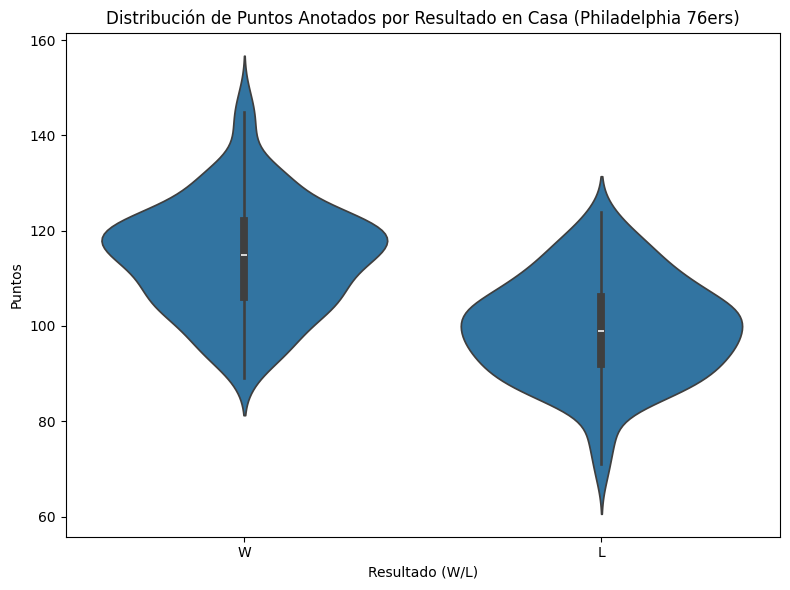

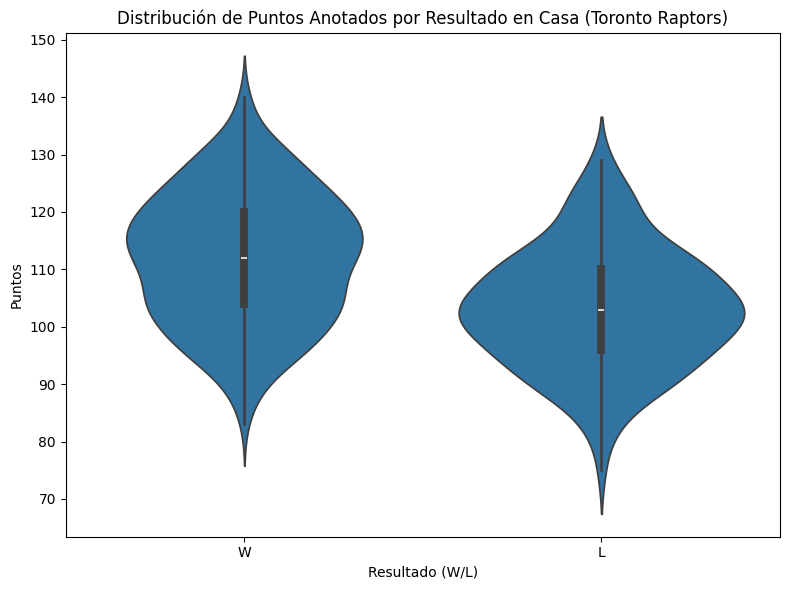

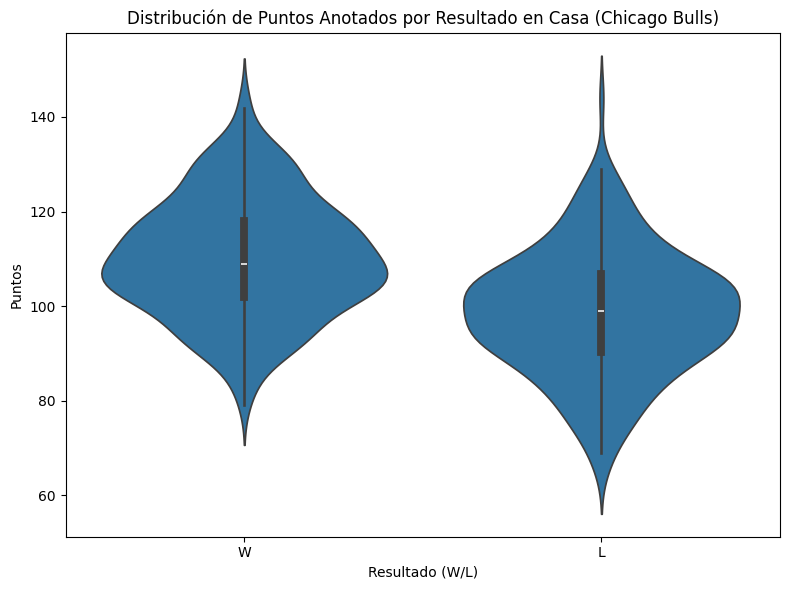

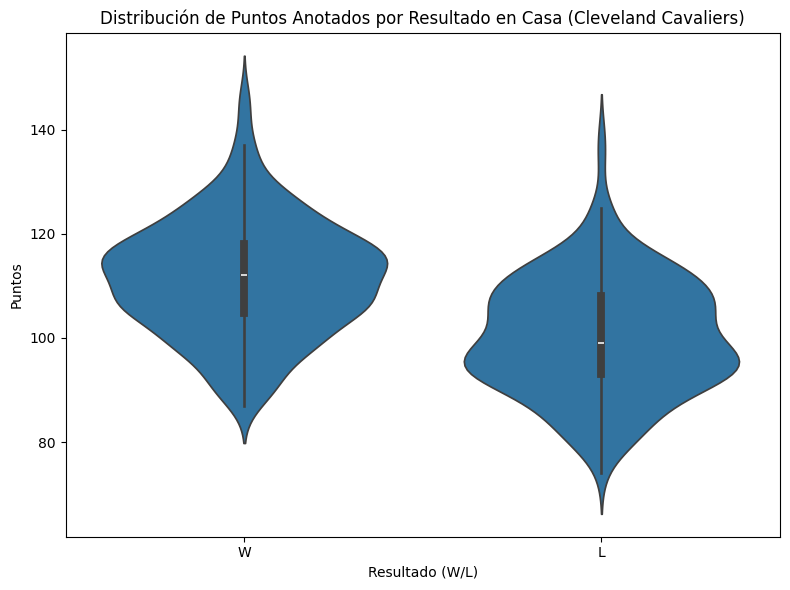

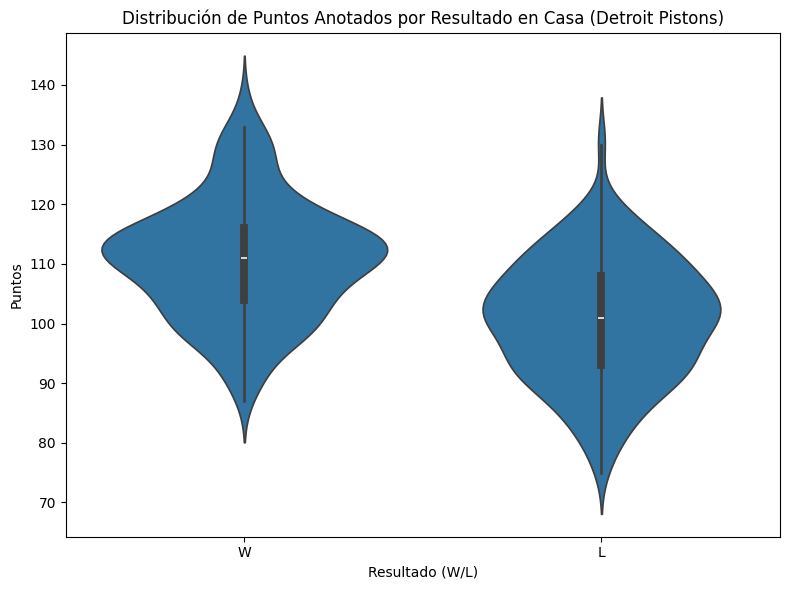

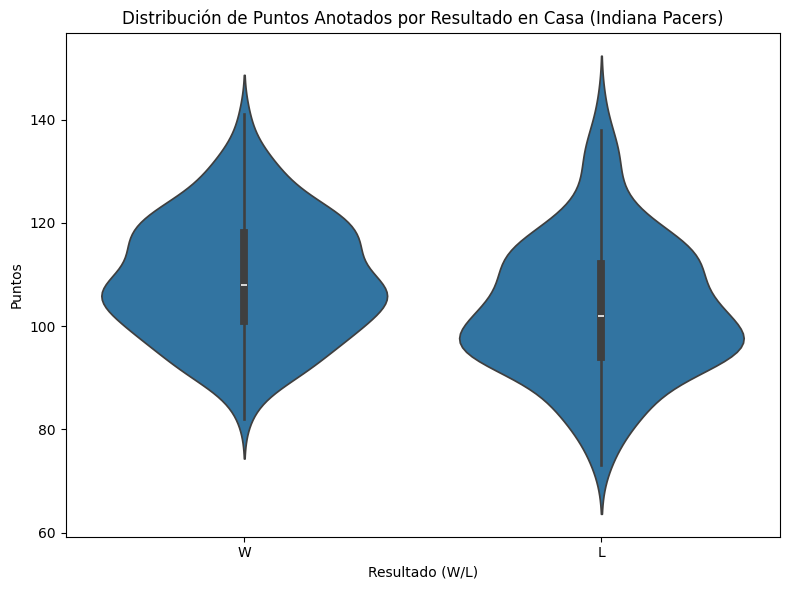

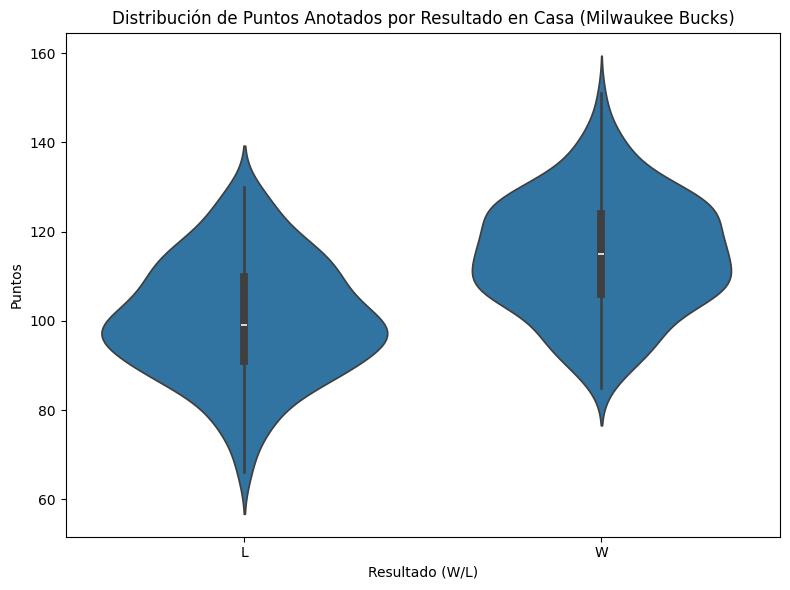

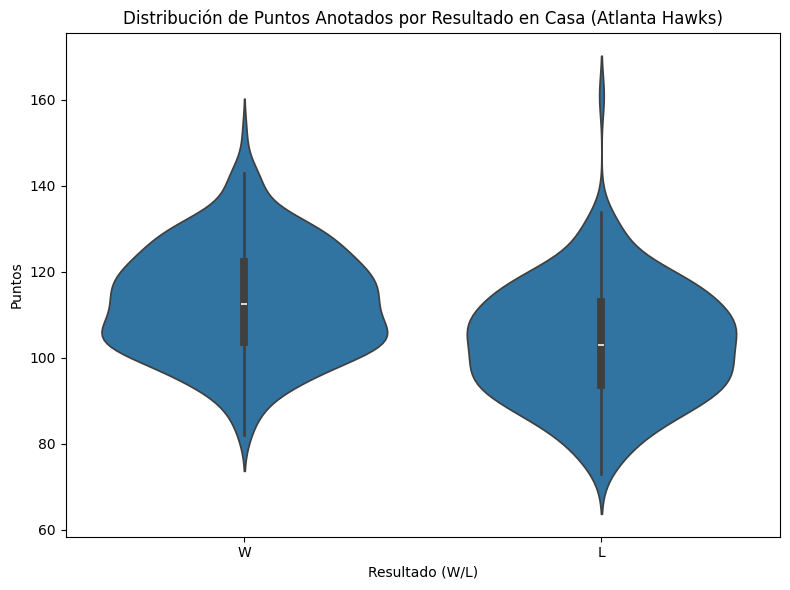

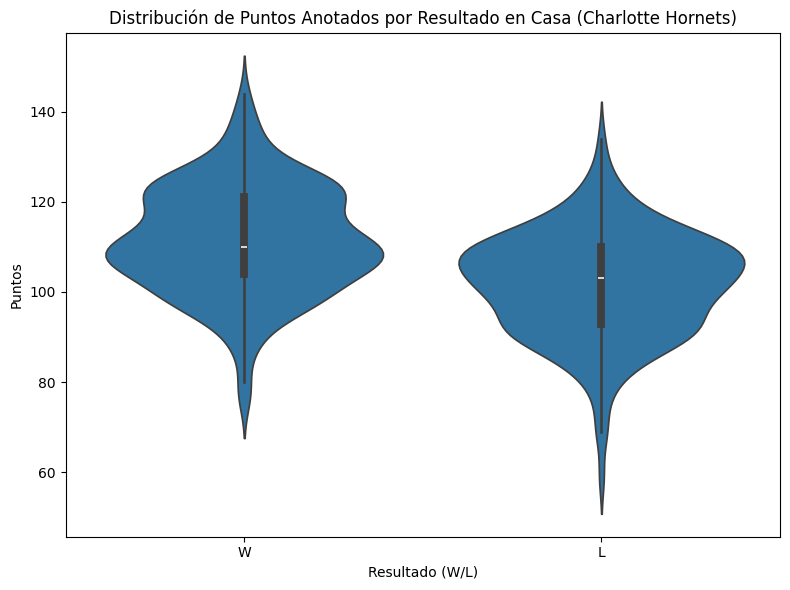

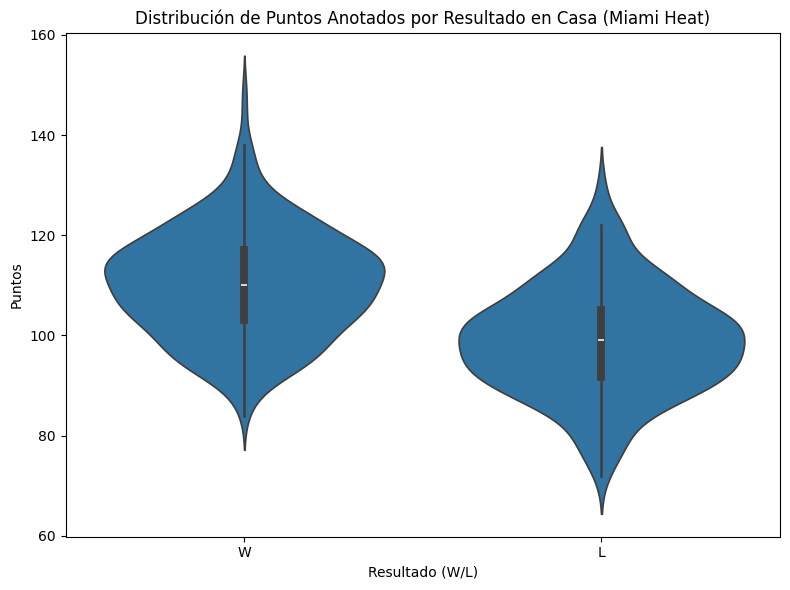

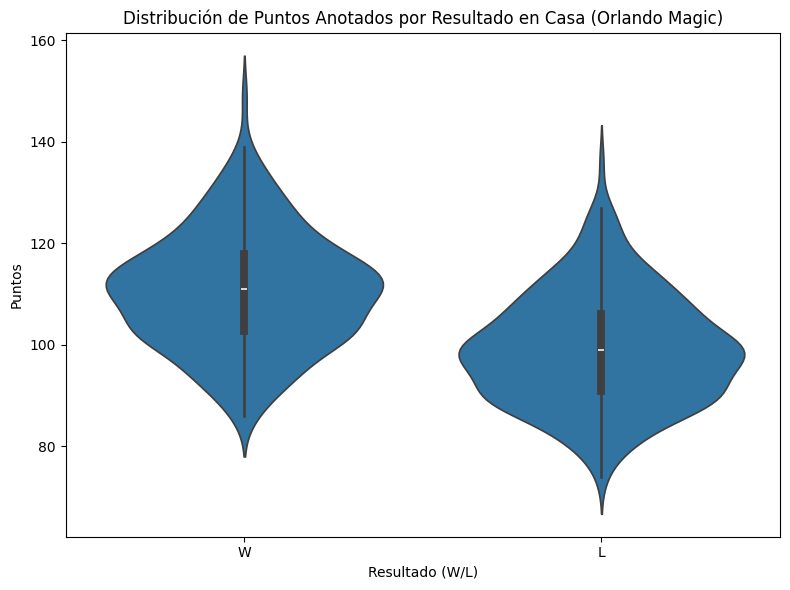

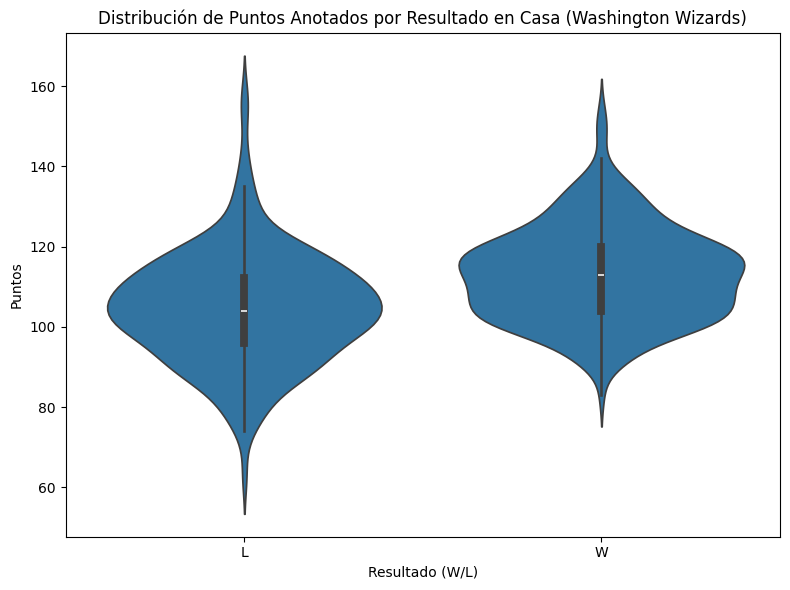

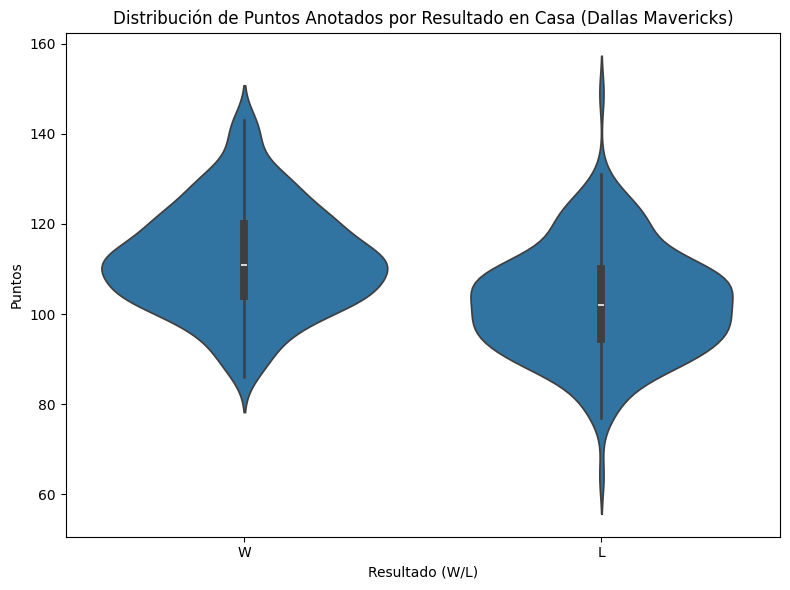

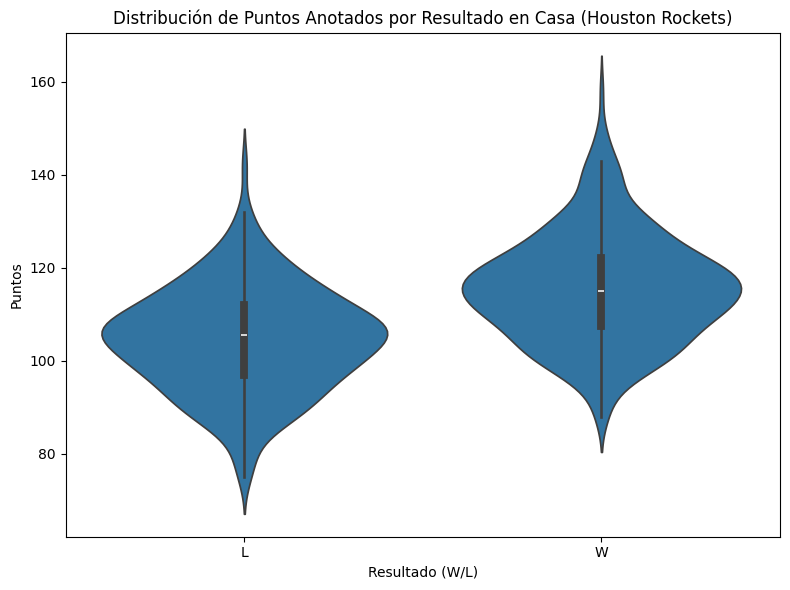

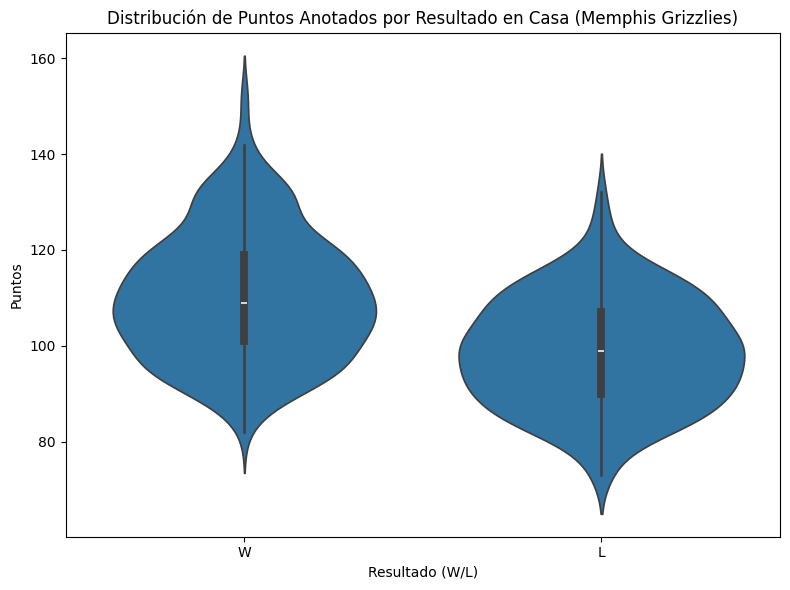

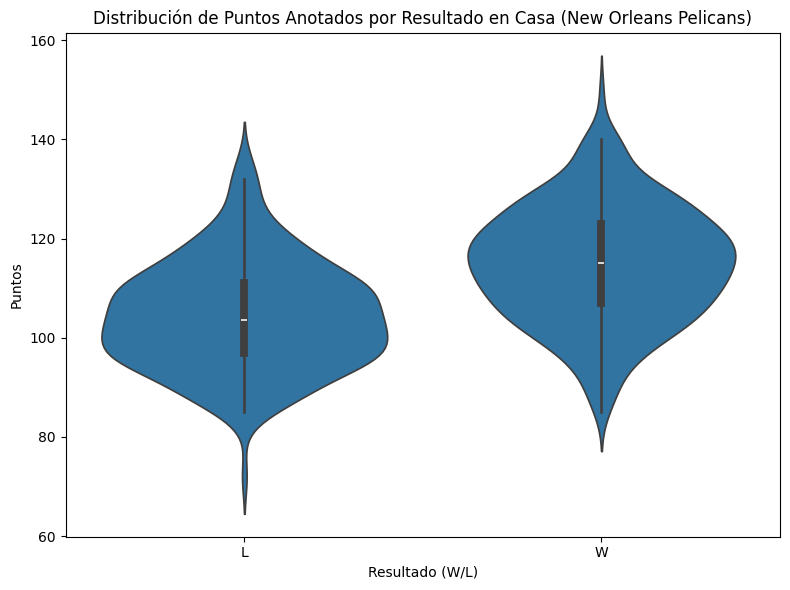

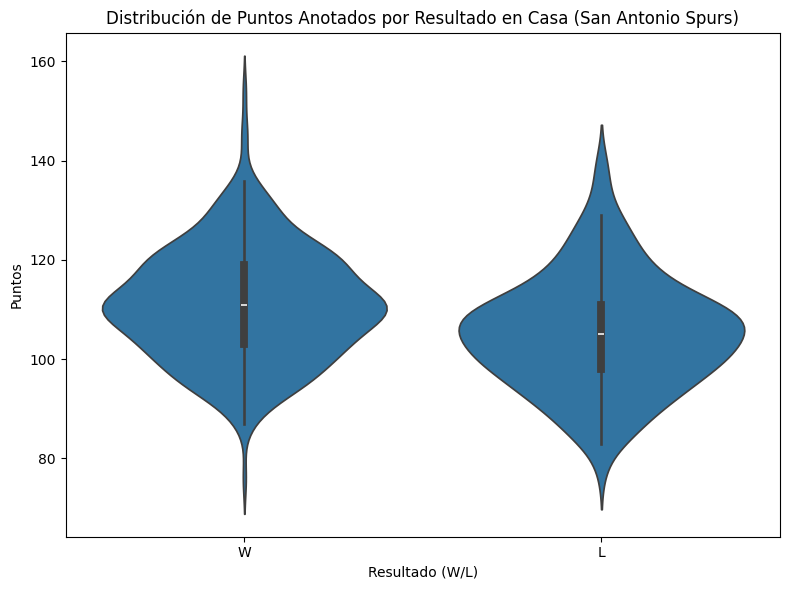

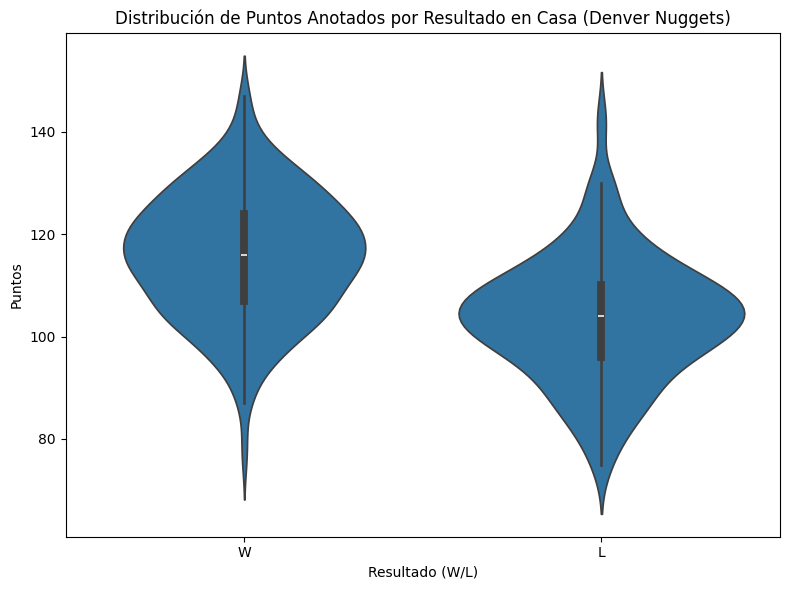

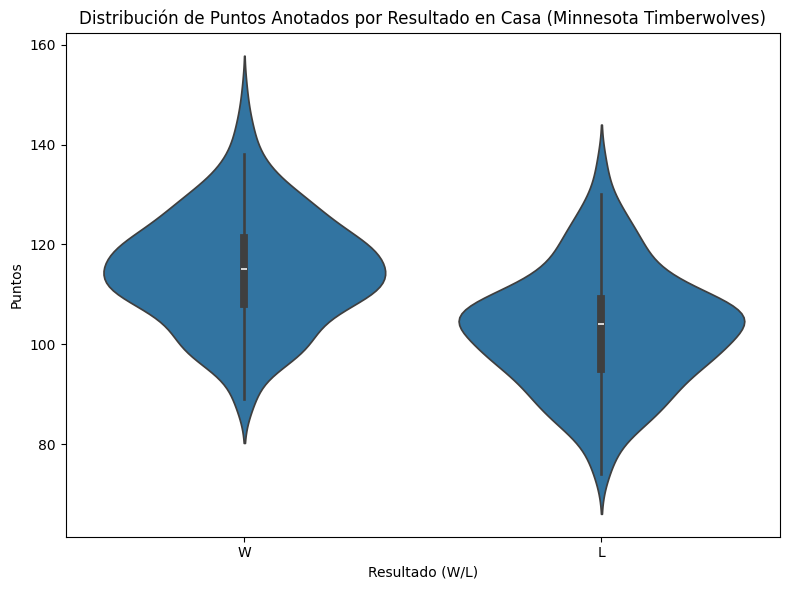

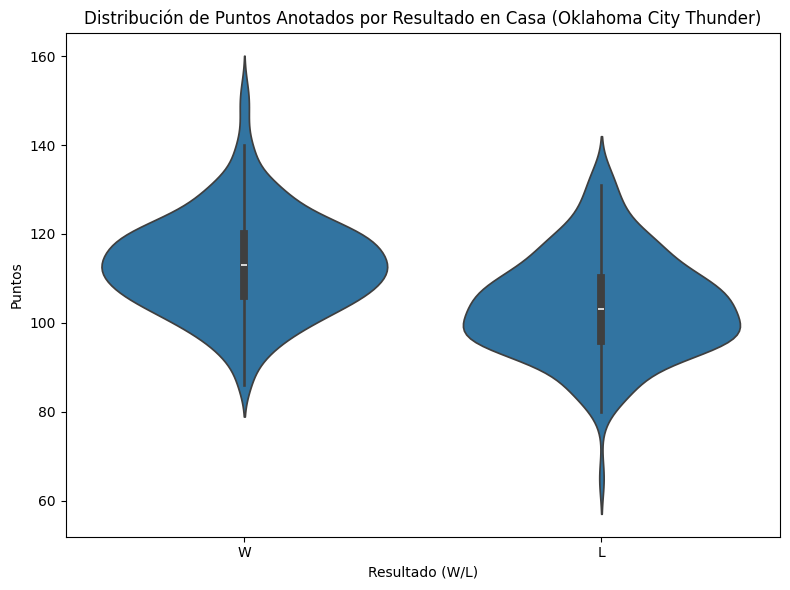

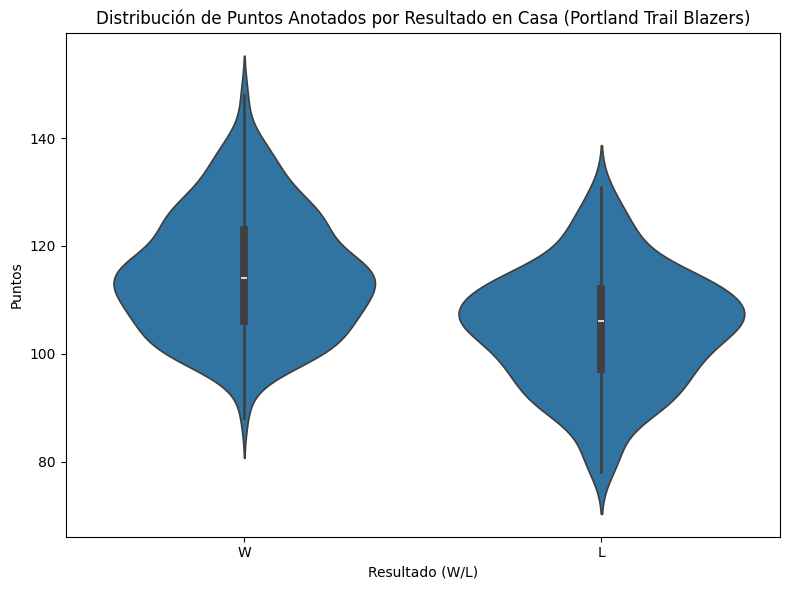

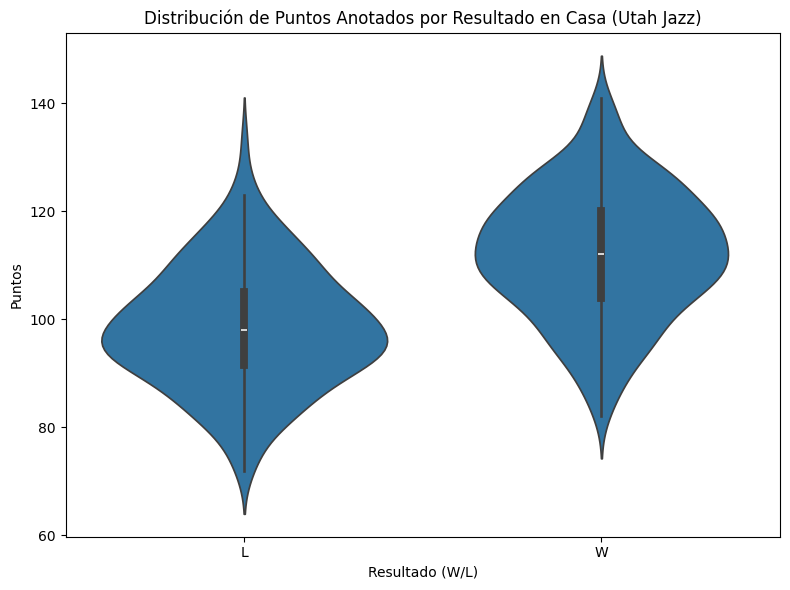

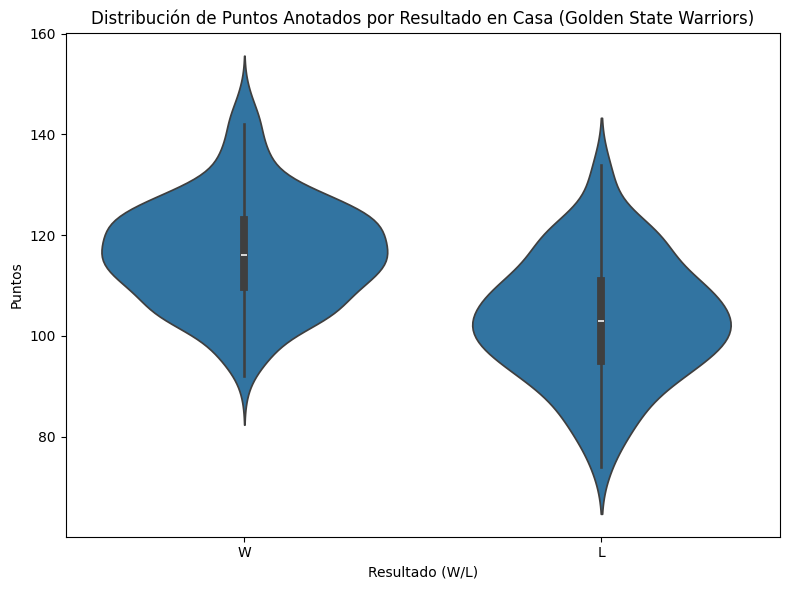

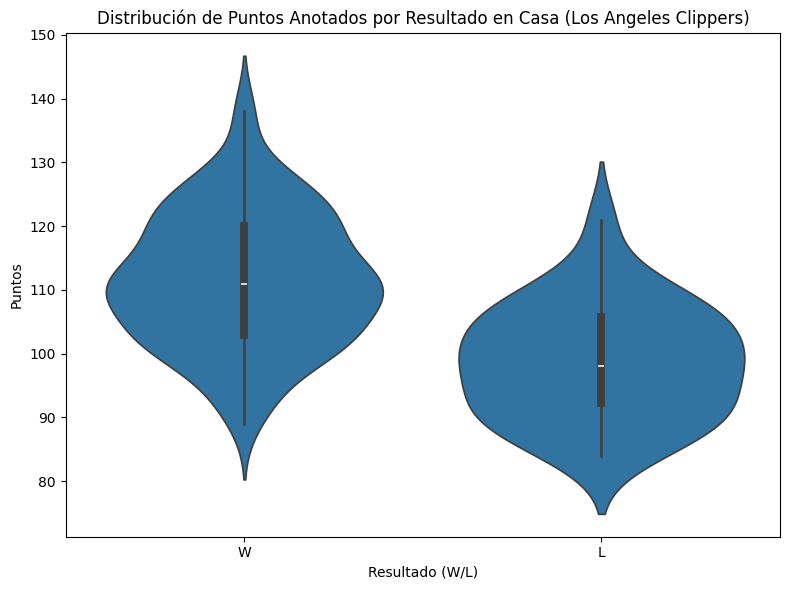

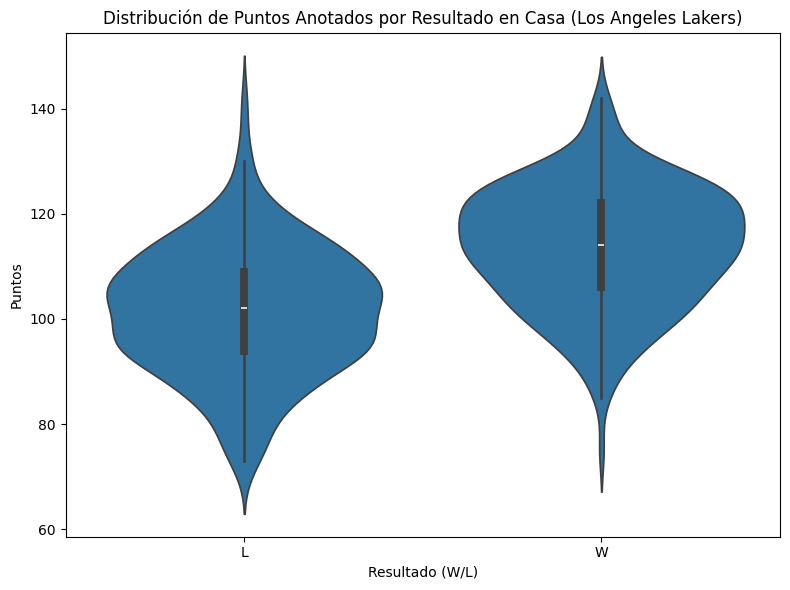

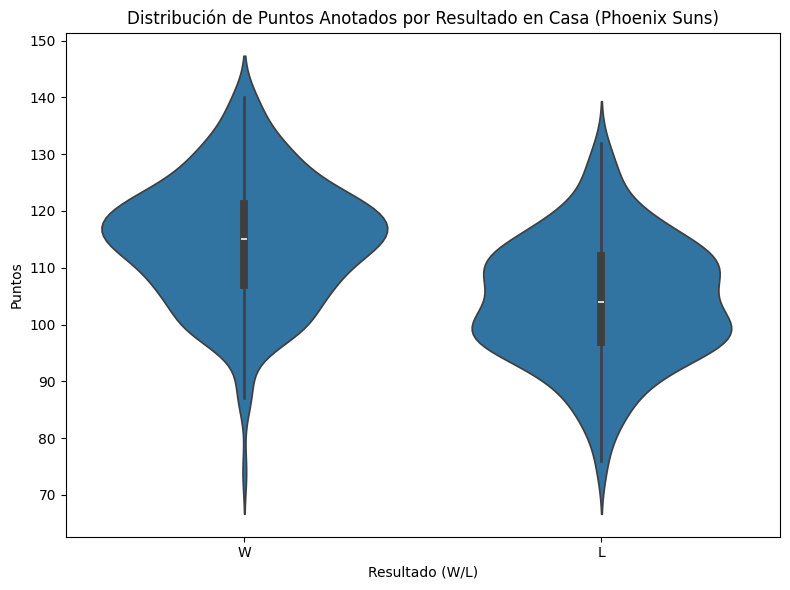

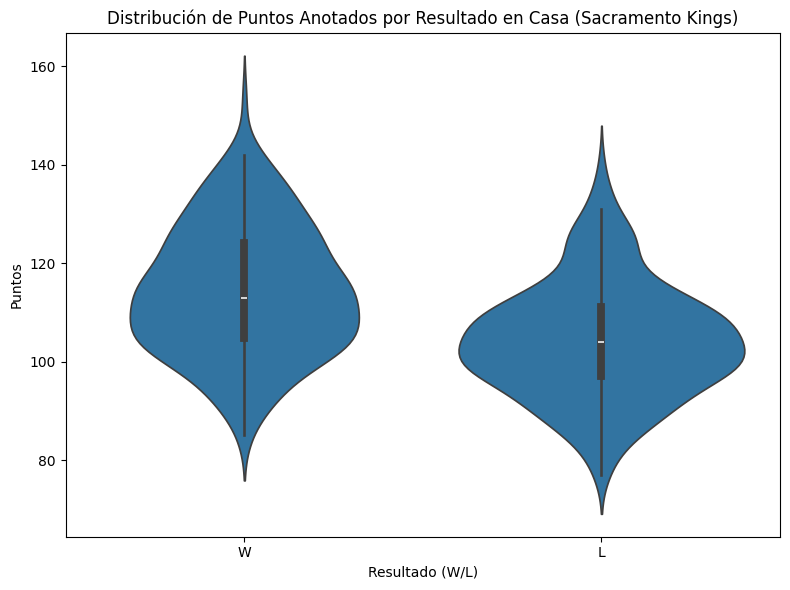

In [48]:
# Función para graficar diagrama de violín por equipo
def plot_violin_by_team(team_data, team_name):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='wl_home', y='pts_home', data=team_data)
    plt.title(f'Distribución de Puntos Anotados por Resultado en Casa ({team_name})')
    plt.xlabel('Resultado (W/L)')
    plt.ylabel('Puntos')
    plt.tight_layout()
    plt.show()

# Graficamos diagrama de violín por equipo para conferencia Este
for team in conferencia_este:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_violin_by_team(team_data, team)

# Graficamos diagrama de violín por equipo para conferencia Oeste
for team in conferencia_oeste:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_violin_by_team(team_data, team)


Gráficos de puntos notados en Casa y fuera, por conferencias y por equipos

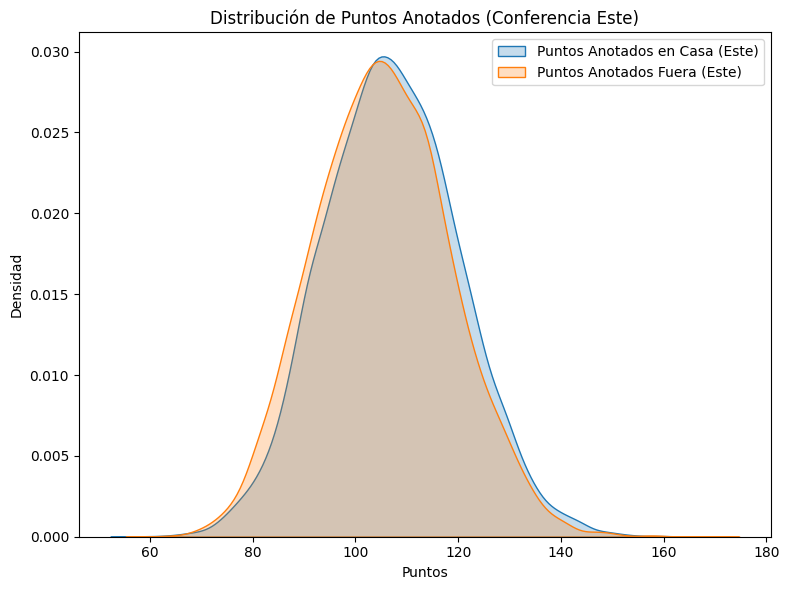

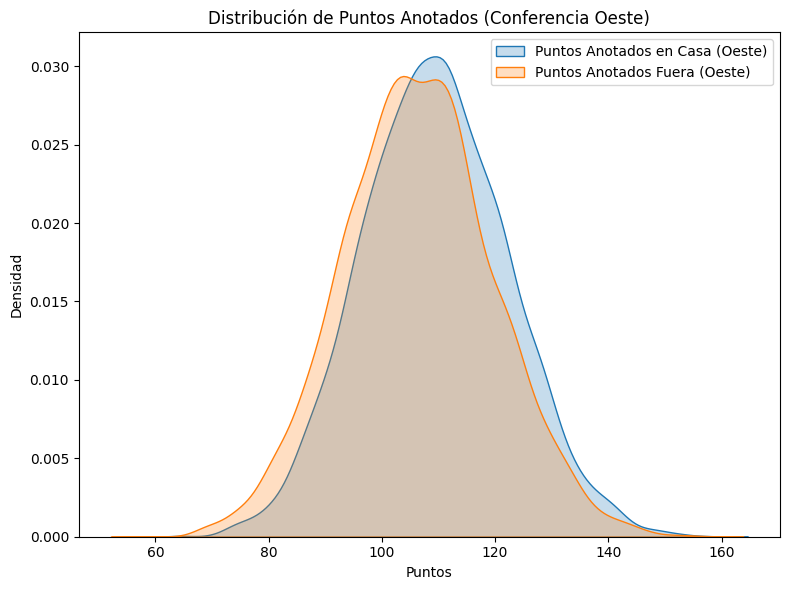

In [49]:
# Filtrar los datos por conferencia Este
game_data_este = game_data[game_data['team_name_home'].isin(conferencia_este)]
game_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste)]

# Gráfico de densidad para la conferencia Este
plt.figure(figsize=(8, 6))
sns.kdeplot(game_data_este['pts_home'], fill=True, label='Puntos Anotados en Casa (Este)')
sns.kdeplot(game_data_este['pts_away'], fill=True, label='Puntos Anotados Fuera (Este)')
plt.title('Distribución de Puntos Anotados (Conferencia Este)')
plt.xlabel('Puntos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de densidad para la conferencia Oeste
plt.figure(figsize=(8, 6))
sns.kdeplot(game_data_oeste['pts_home'], fill=True, label='Puntos Anotados en Casa (Oeste)')
sns.kdeplot(game_data_oeste['pts_away'], fill=True, label='Puntos Anotados Fuera (Oeste)')
plt.title('Distribución de Puntos Anotados (Conferencia Oeste)')
plt.xlabel('Puntos')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


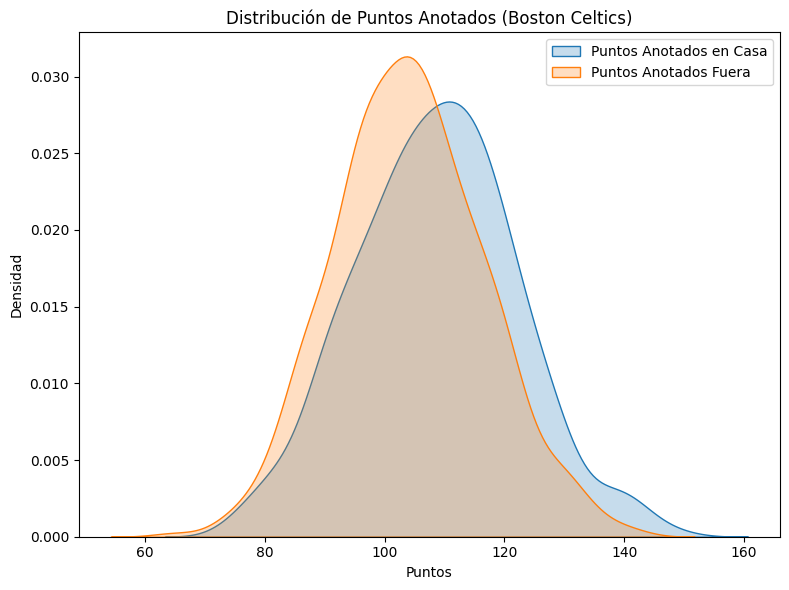

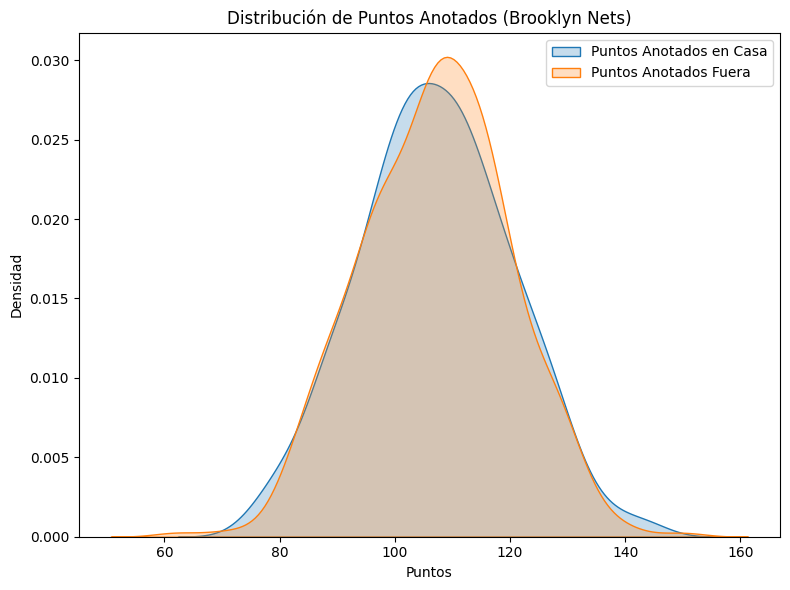

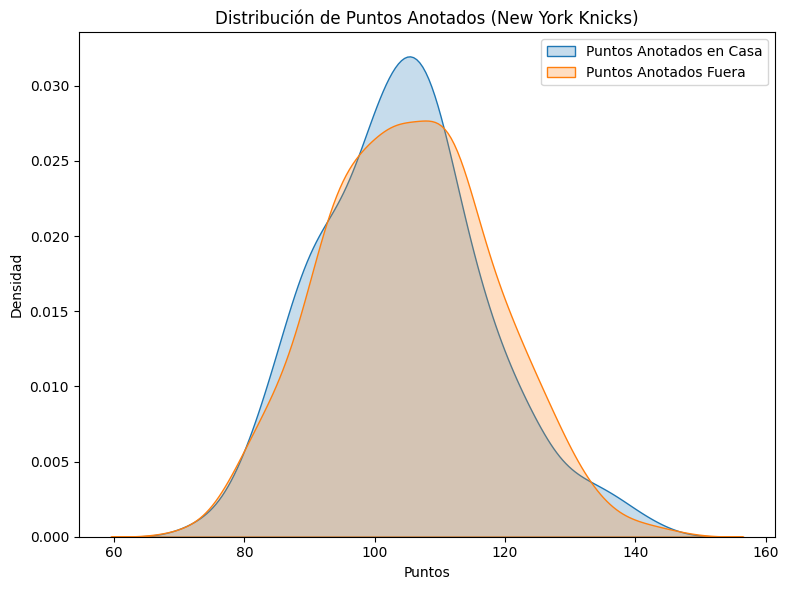

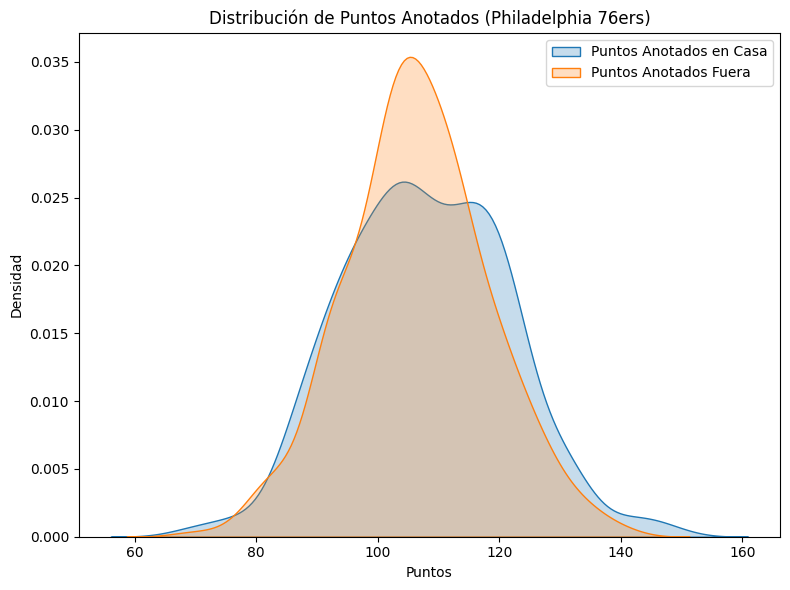

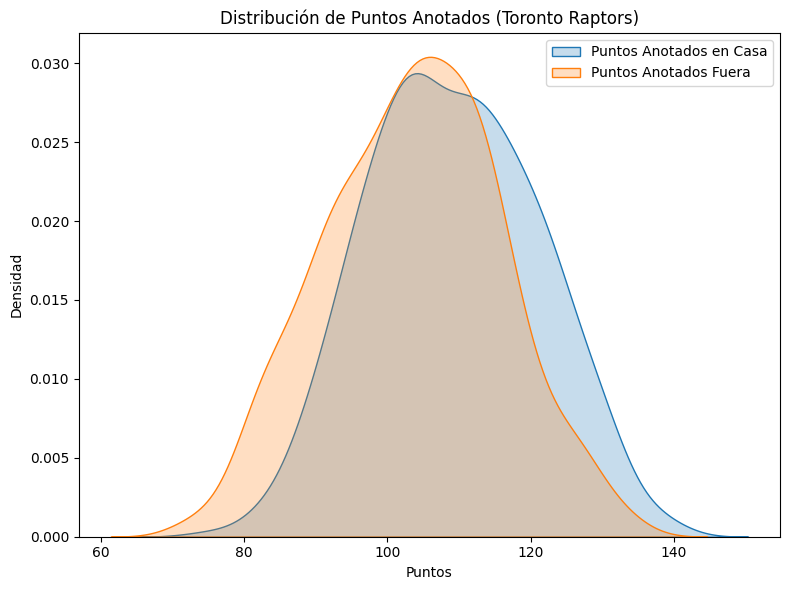

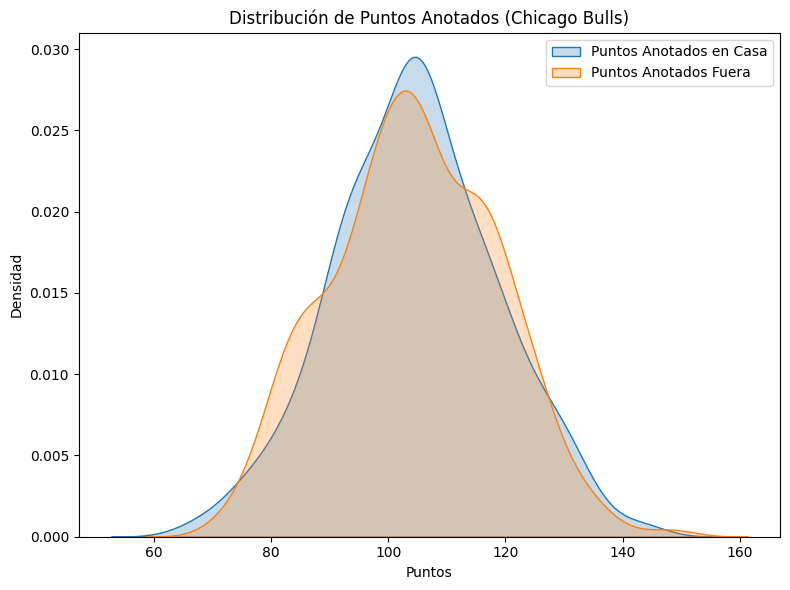

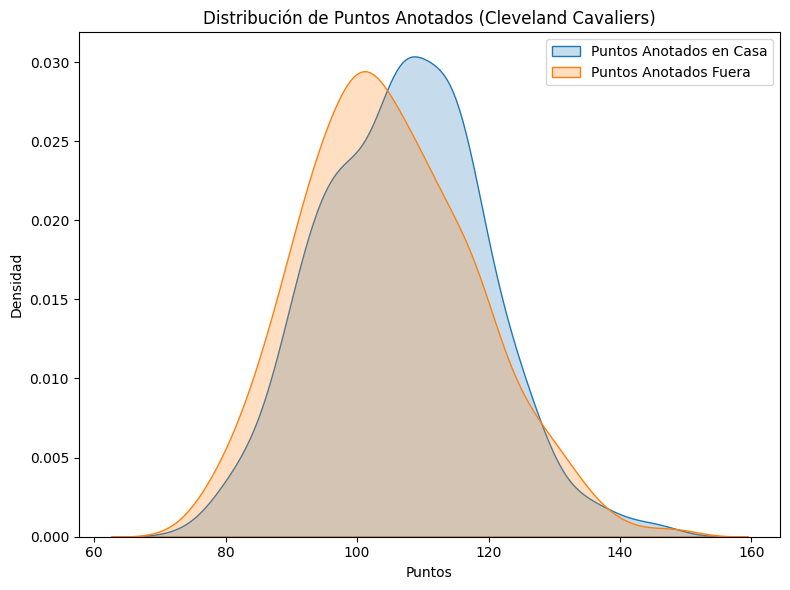

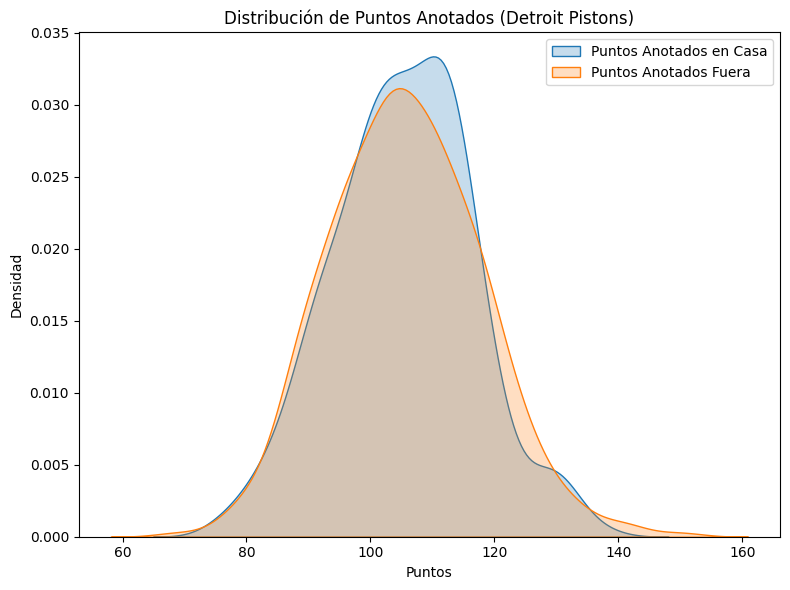

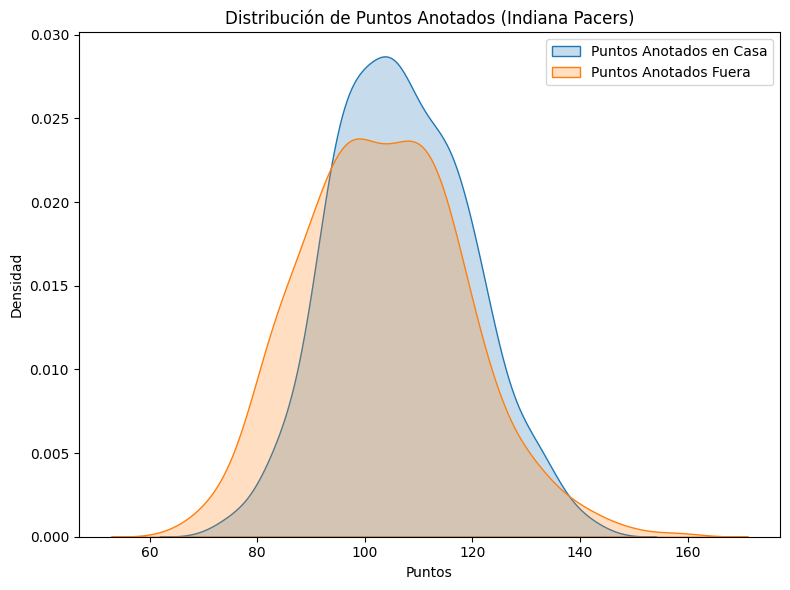

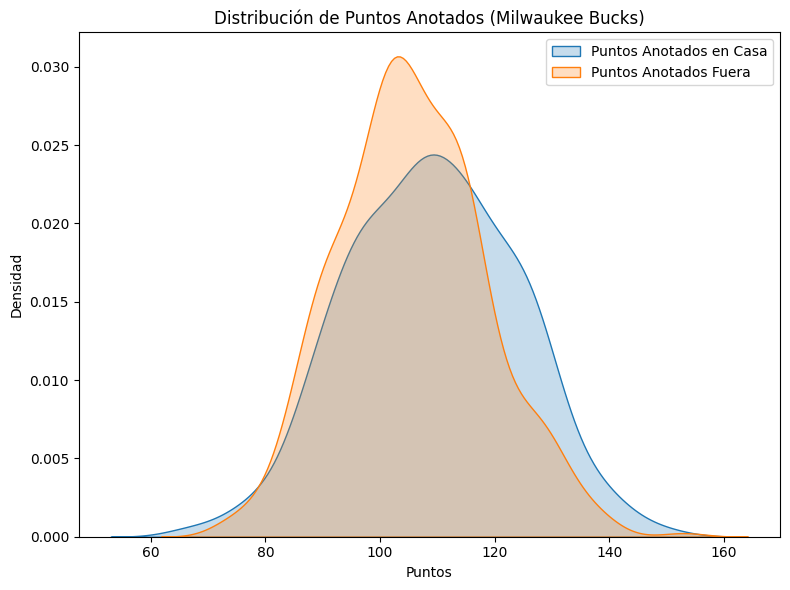

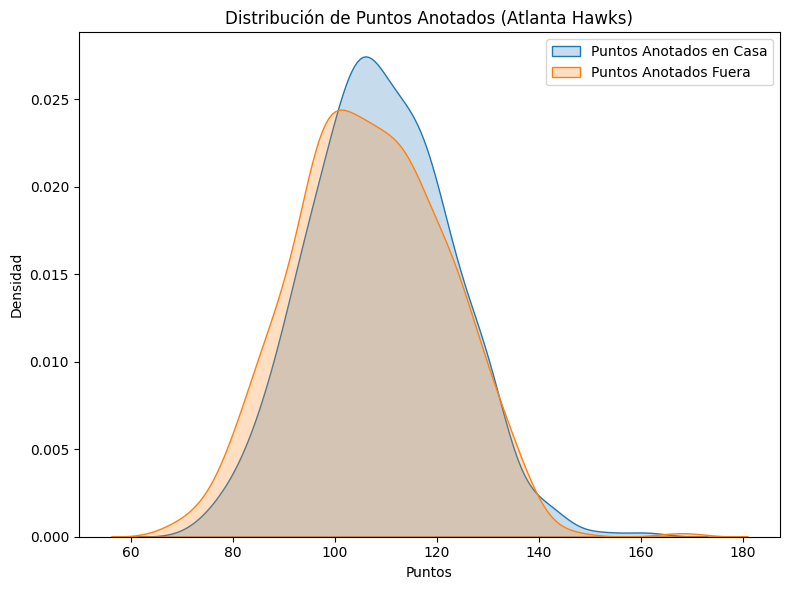

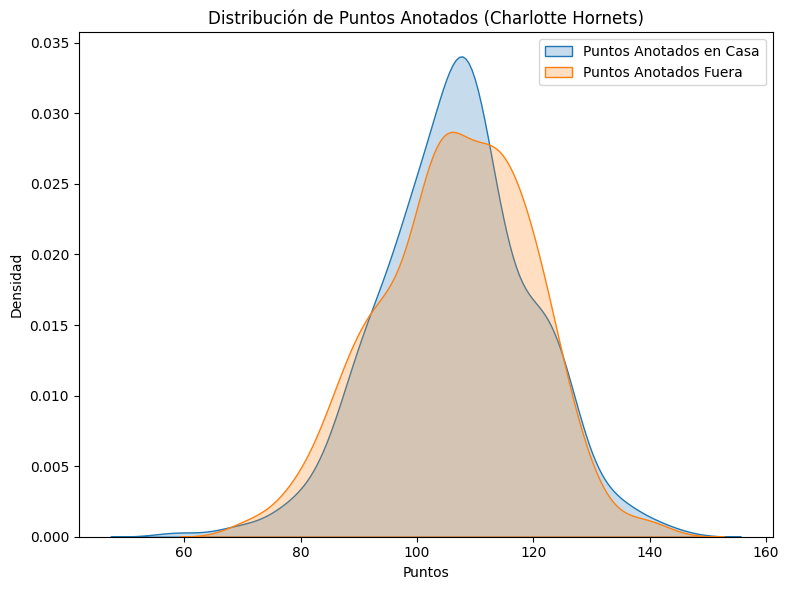

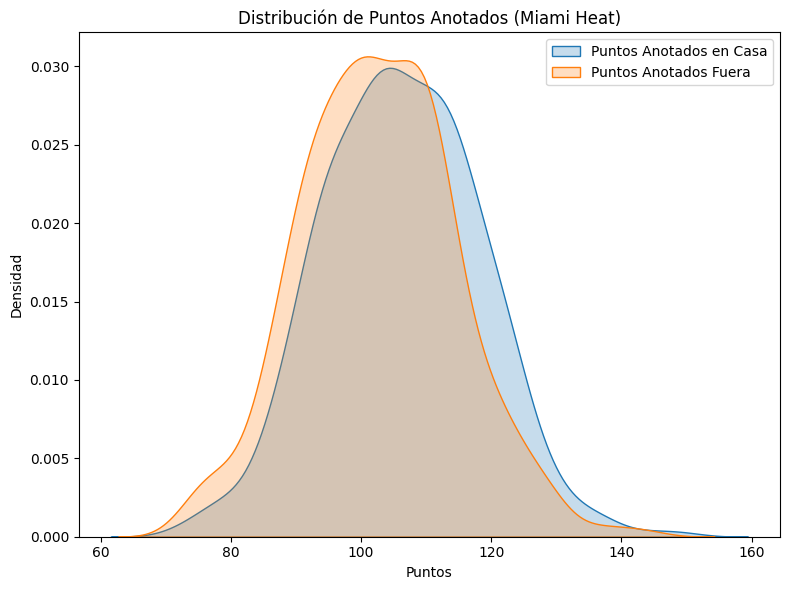

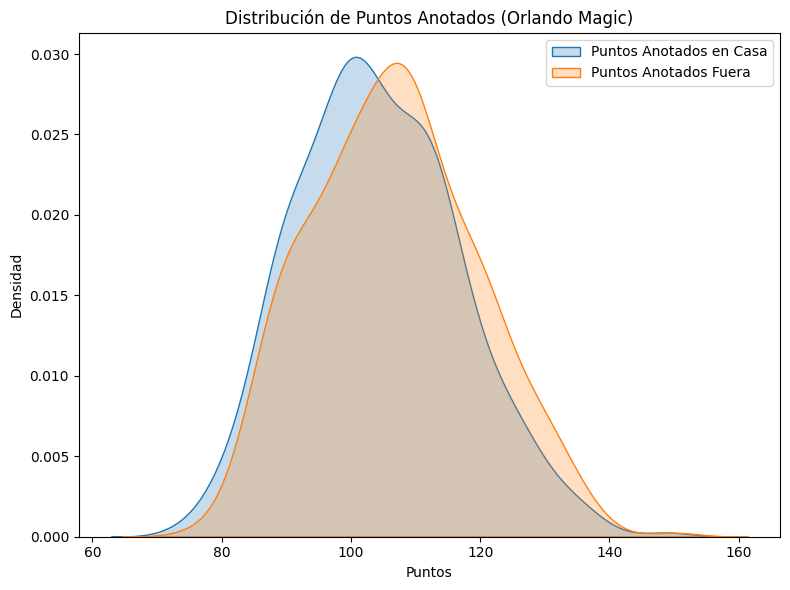

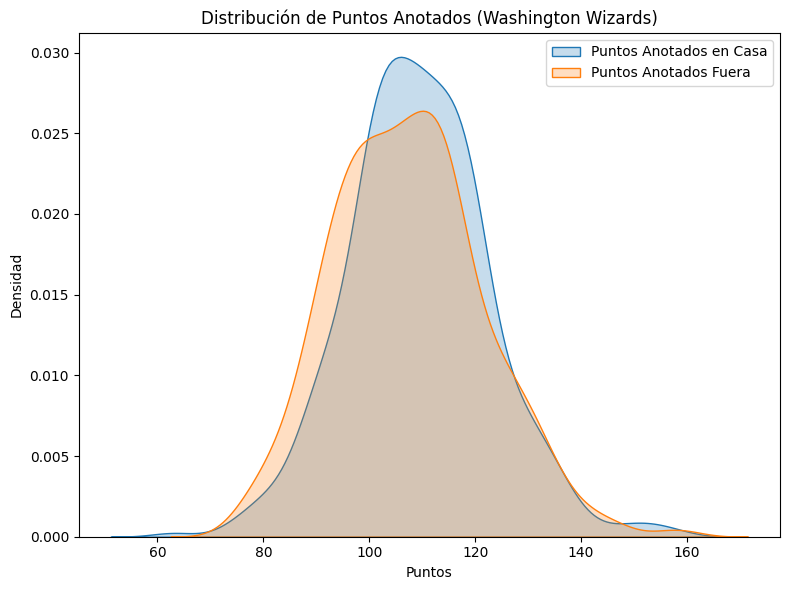

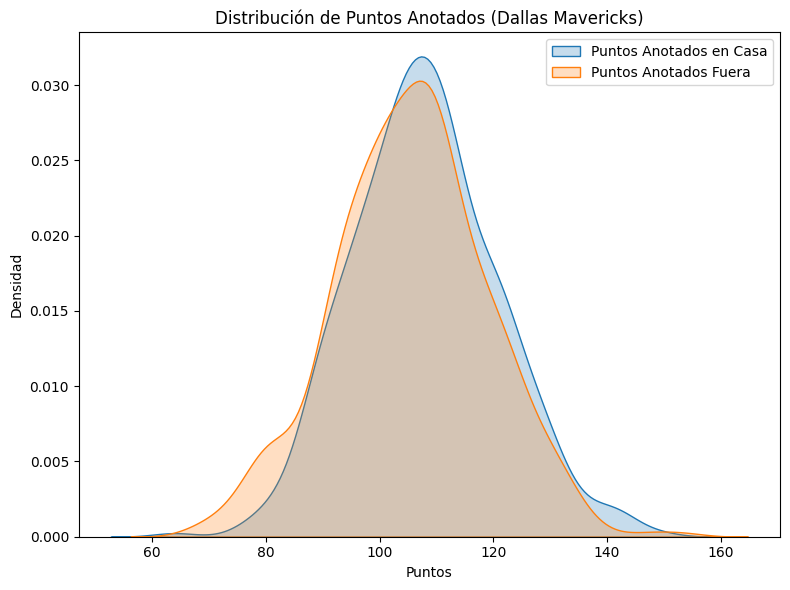

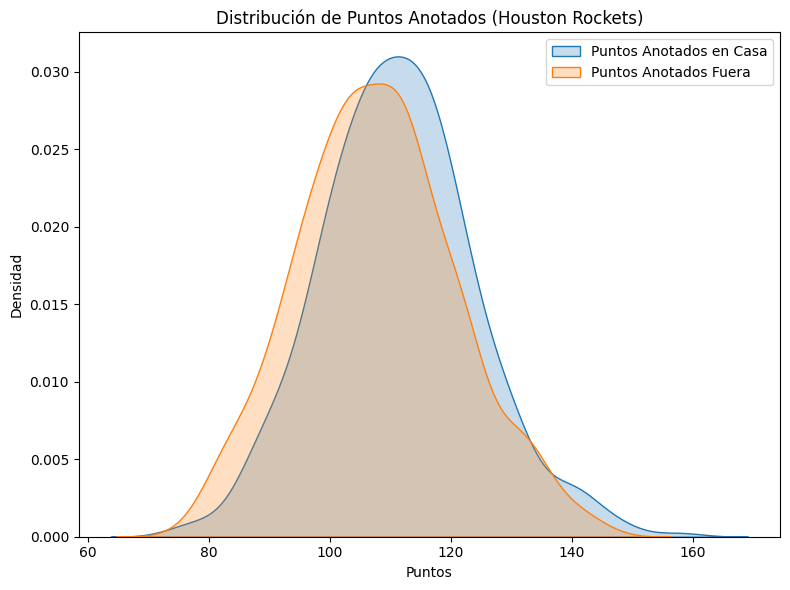

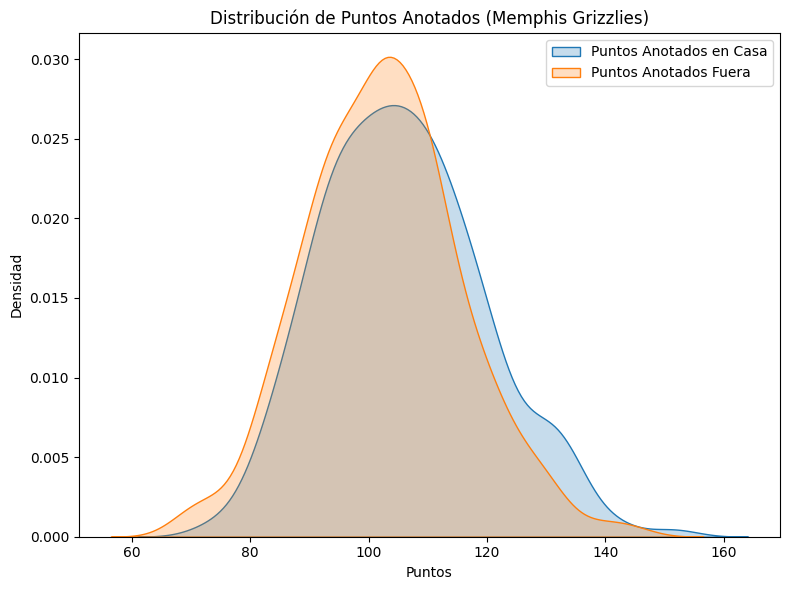

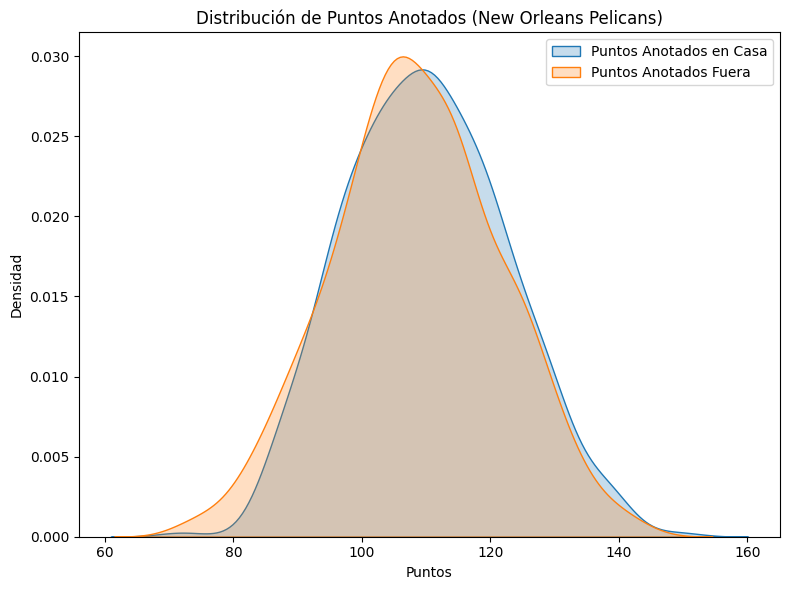

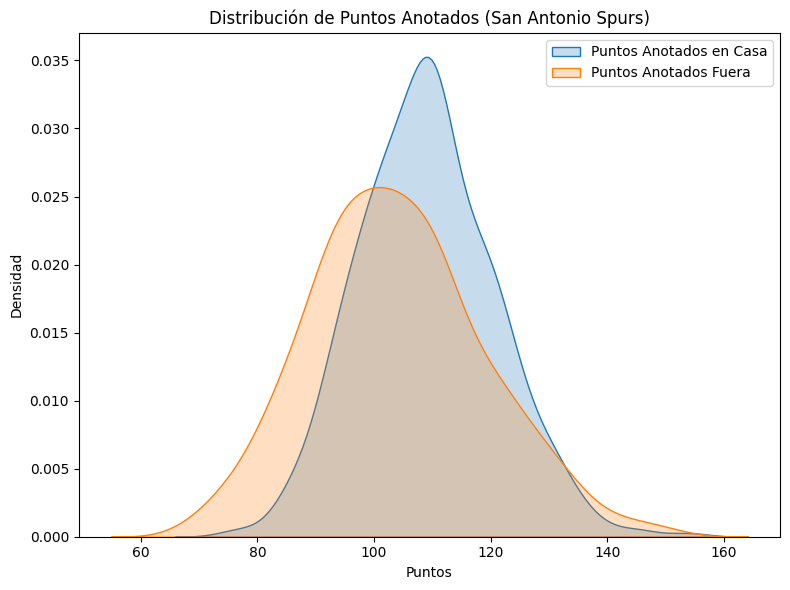

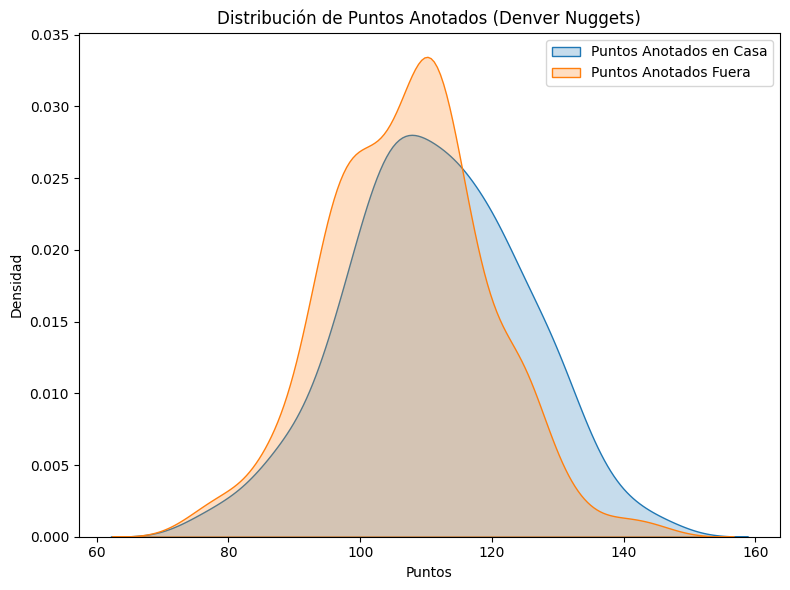

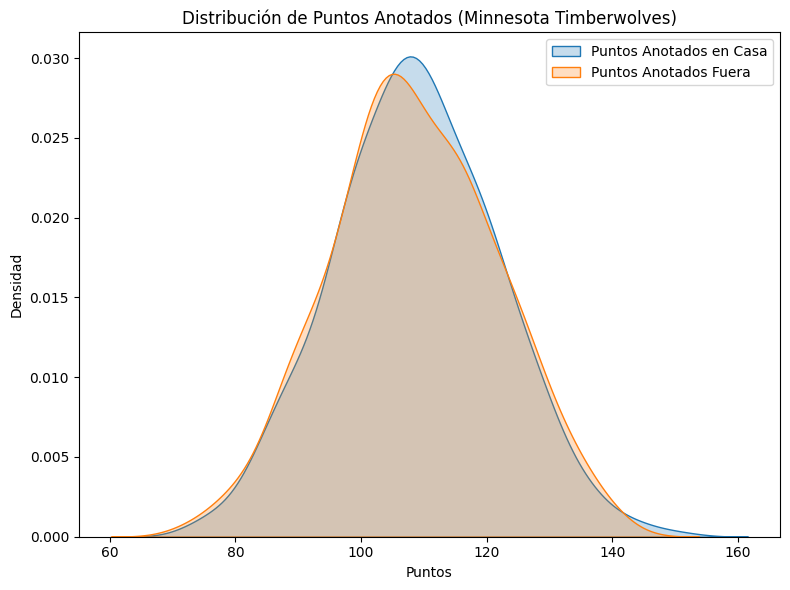

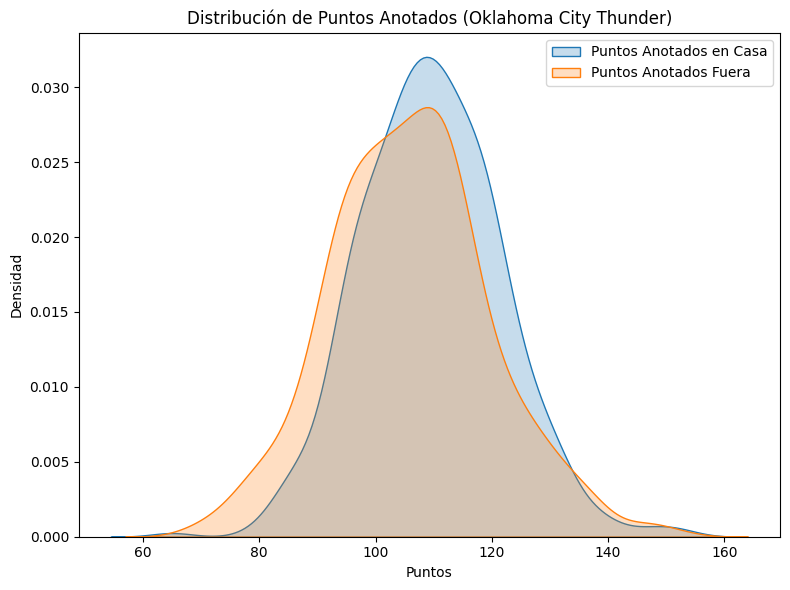

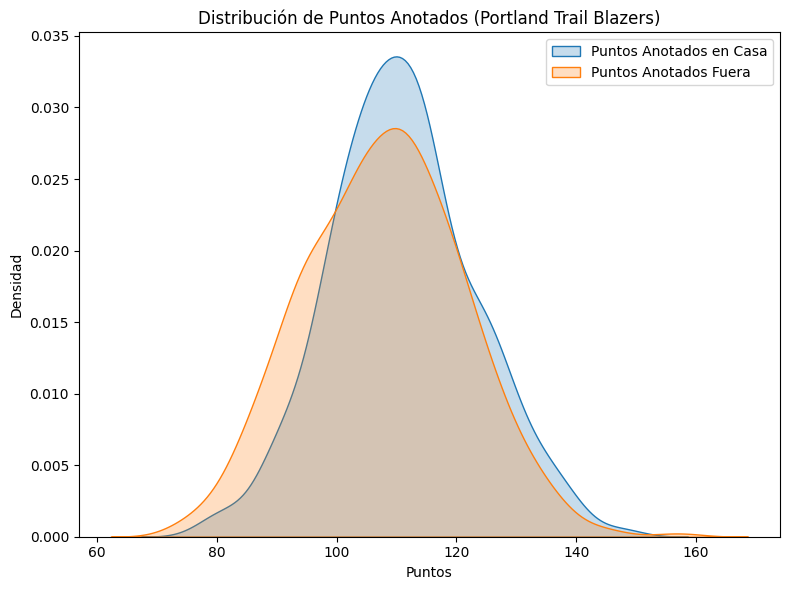

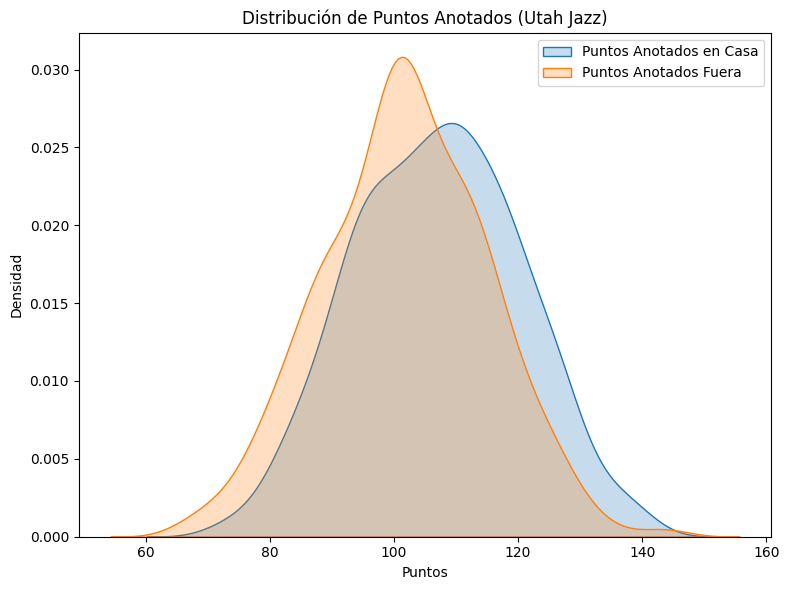

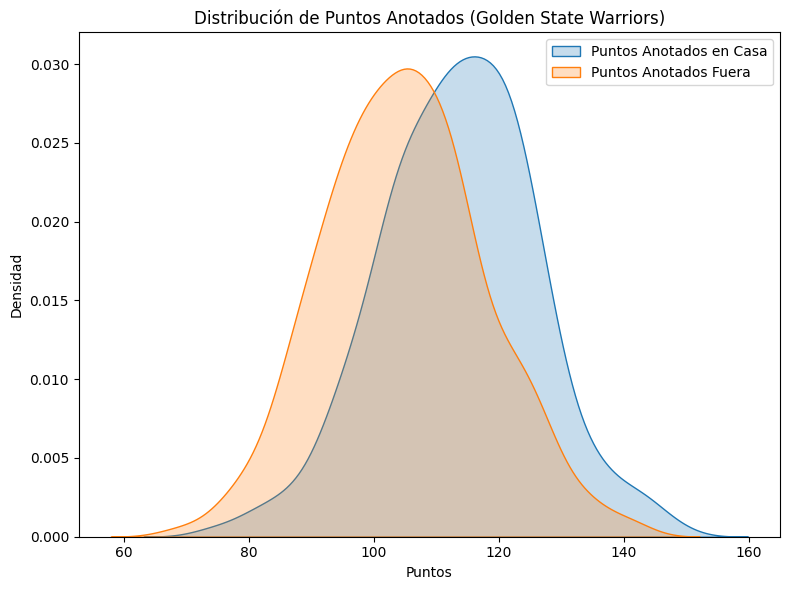

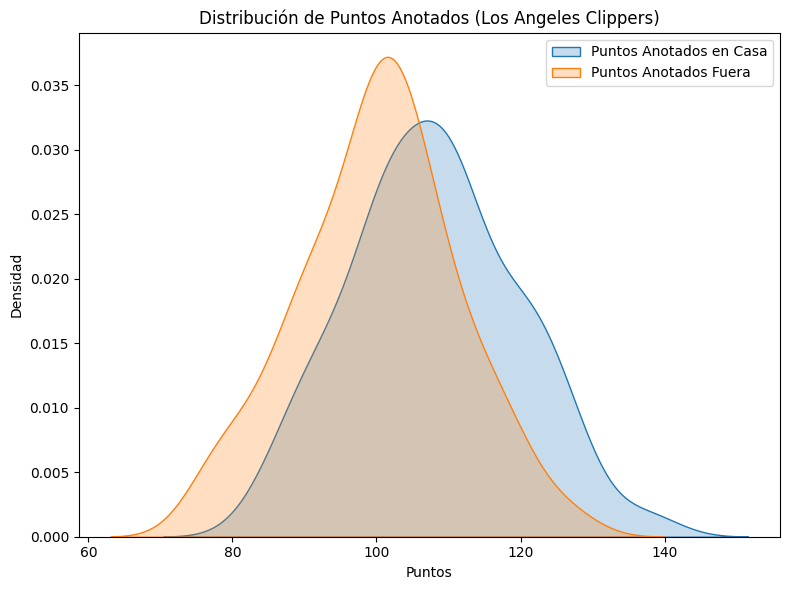

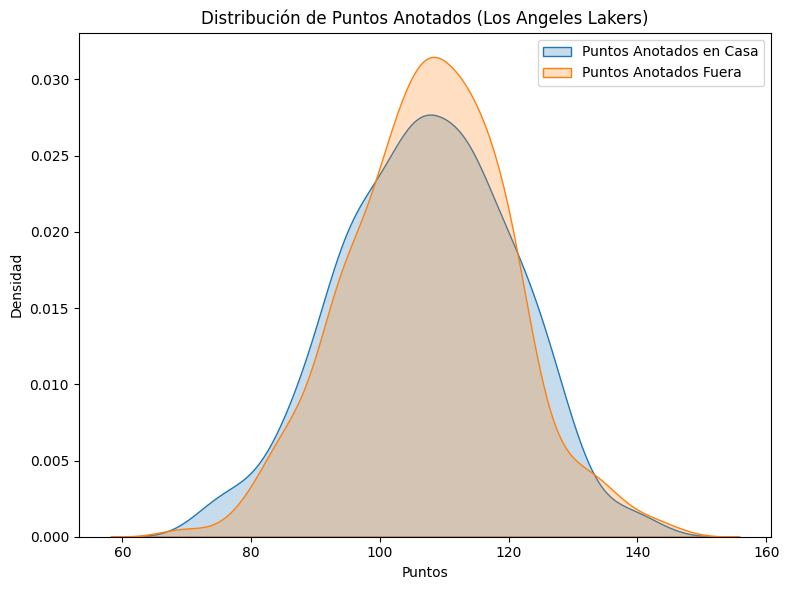

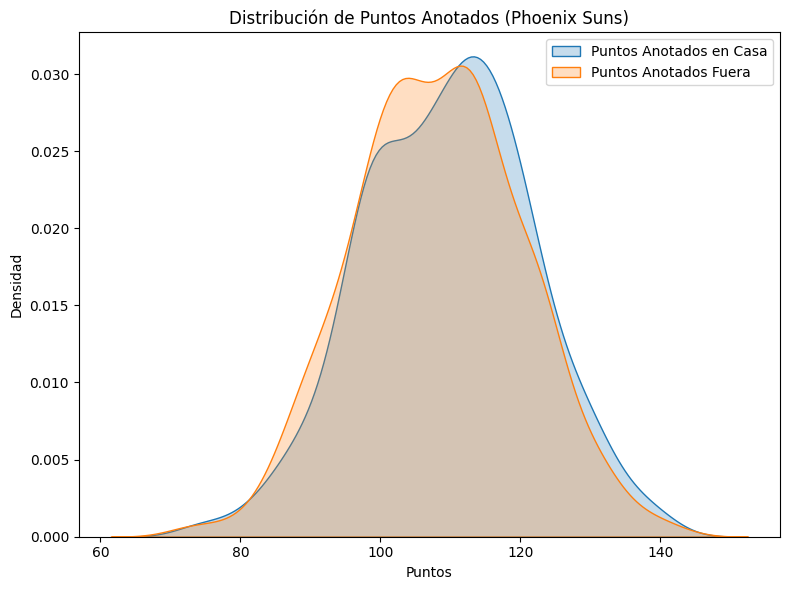

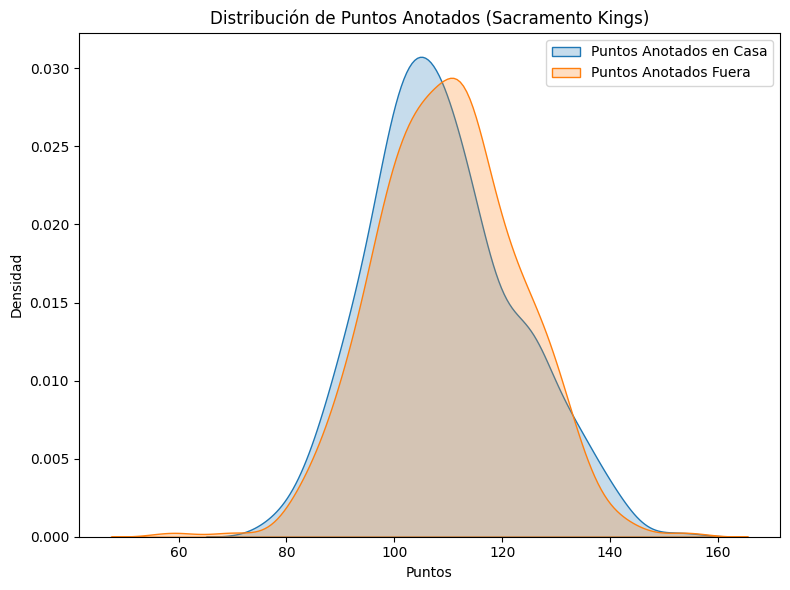

In [50]:
# Función para graficar densidad por equipo
def plot_density_by_team(team_data, team_name):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(team_data['pts_home'], fill=True, label='Puntos Anotados en Casa')
    sns.kdeplot(team_data['pts_away'], fill=True, label='Puntos Anotados Fuera')
    plt.title(f'Distribución de Puntos Anotados ({team_name})')
    plt.xlabel('Puntos')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Graficamos densidad por equipo para conferencia Este
for team in conferencia_este:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_density_by_team(team_data, team)

# Graficamos densidad por equipo para conferencia Oeste
for team in conferencia_oeste:
    team_data = game_data[game_data['team_name_home'] == team]
    plot_density_by_team(team_data, team)


Promedio de puentos anotados por equipo y por conferencia

<Figure size 1200x800 with 0 Axes>

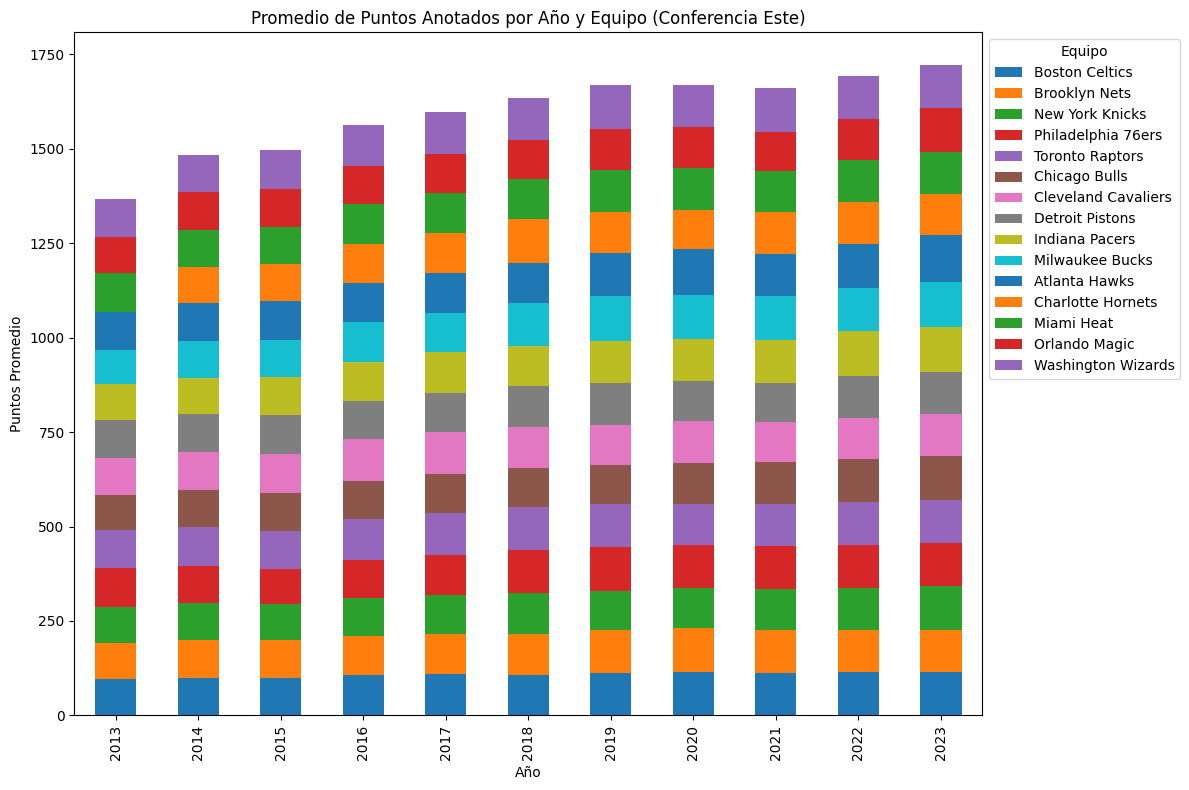

<Figure size 1200x800 with 0 Axes>

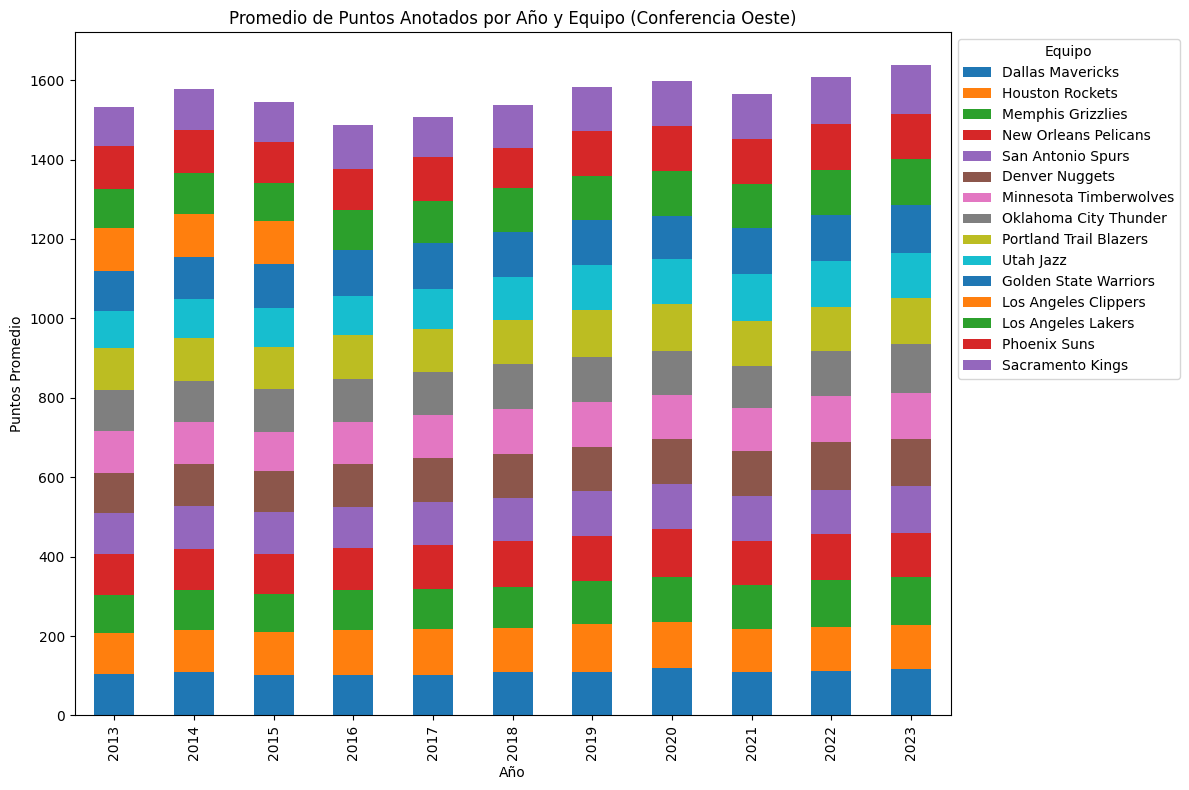

In [51]:
# Calculamos el promedio de puntos por año y equipo
points_by_team_per_year = game_data.groupby(['year', 'team_name_home'])['pts_home'].mean().unstack()

# Filtramos los equipos por conferencia Este
points_by_team_per_year_este = points_by_team_per_year[conferencia_este]

# Filtramos los equipos por conferencia Oeste
points_by_team_per_year_oeste = points_by_team_per_year[conferencia_oeste]

# Graficamos los promedios de puntos por año y equipo para la conferencia Este
plt.figure(figsize=(12, 8))
points_by_team_per_year_este.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Promedio de Puntos Anotados por Año y Equipo (Conferencia Este)')
plt.xlabel('Año')
plt.ylabel('Puntos Promedio')
plt.legend(title='Equipo', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Graficamos los promedios de puntos por año y equipo para la conferencia Oeste
plt.figure(figsize=(12, 8))
points_by_team_per_year_oeste.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Promedio de Puntos Anotados por Año y Equipo (Conferencia Oeste)')
plt.xlabel('Año')
plt.ylabel('Puntos Promedio')
plt.legend(title='Equipo', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


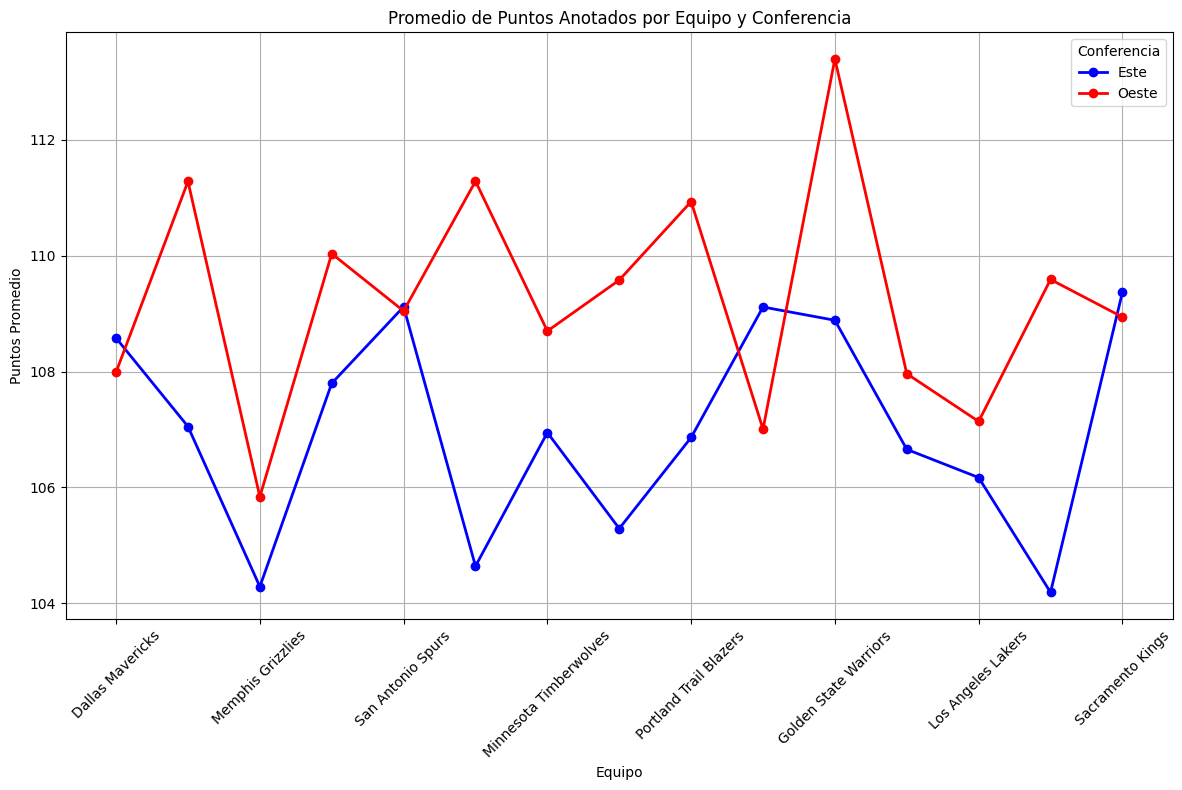

In [52]:
# EDA basado en conferencias

# Ejemplo de análisis de puntos promedio por equipo a lo largo de la temporada
# 1. Calcular promedio de puntos por equipo y fecha
points_by_team_over_time = game_data.groupby(['game_date', 'team_name_home'])['pts_home'].mean().unstack()

# 2. Filtrar por equipos de conferencias Este y Oeste
conferencia_este = equipos_nba["Este"]
conferencia_oeste = equipos_nba["Oeste"]

# Filtrar solo los equipos presentes en points_by_team_over_time
equipos_presentes = [equipo for equipo in conferencia_este + conferencia_oeste if equipo in points_by_team_over_time.columns]

points_by_team_conference_over_time = points_by_team_over_time[equipos_presentes]

# 3. Graficar puntos promedio por equipo y conferencia a lo largo de la temporada
plt.figure(figsize=(12, 8))

# Colores para cada conferencia
colores = {'Este': 'blue', 'Oeste': 'red'}

# Iterar sobre las conferencias y graficar los puntos promedio por equipo
for conferencia in ['Este', 'Oeste']:
    subset = points_by_team_conference_over_time[equipos_nba[conferencia]]
    subset.mean().plot(kind='line', marker='o', linestyle='-', color=colores[conferencia], label=conferencia, linewidth=2)

# Añadir título y etiquetas
plt.title('Promedio de Puntos Anotados por Equipo y Conferencia')
plt.xlabel('Equipo')
plt.ylabel('Puntos Promedio')
plt.xticks(rotation=45)
plt.legend(title='Conferencia')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 4. Realizar otros análisis comparativos según tus necesidades (porcentaje de tiros de campo, rebotes, etc.)

# Ejemplo de comparación de porcentaje de tiros de campo por conferencia
# ...




### Puntos Anotados por Juego - Conferencia

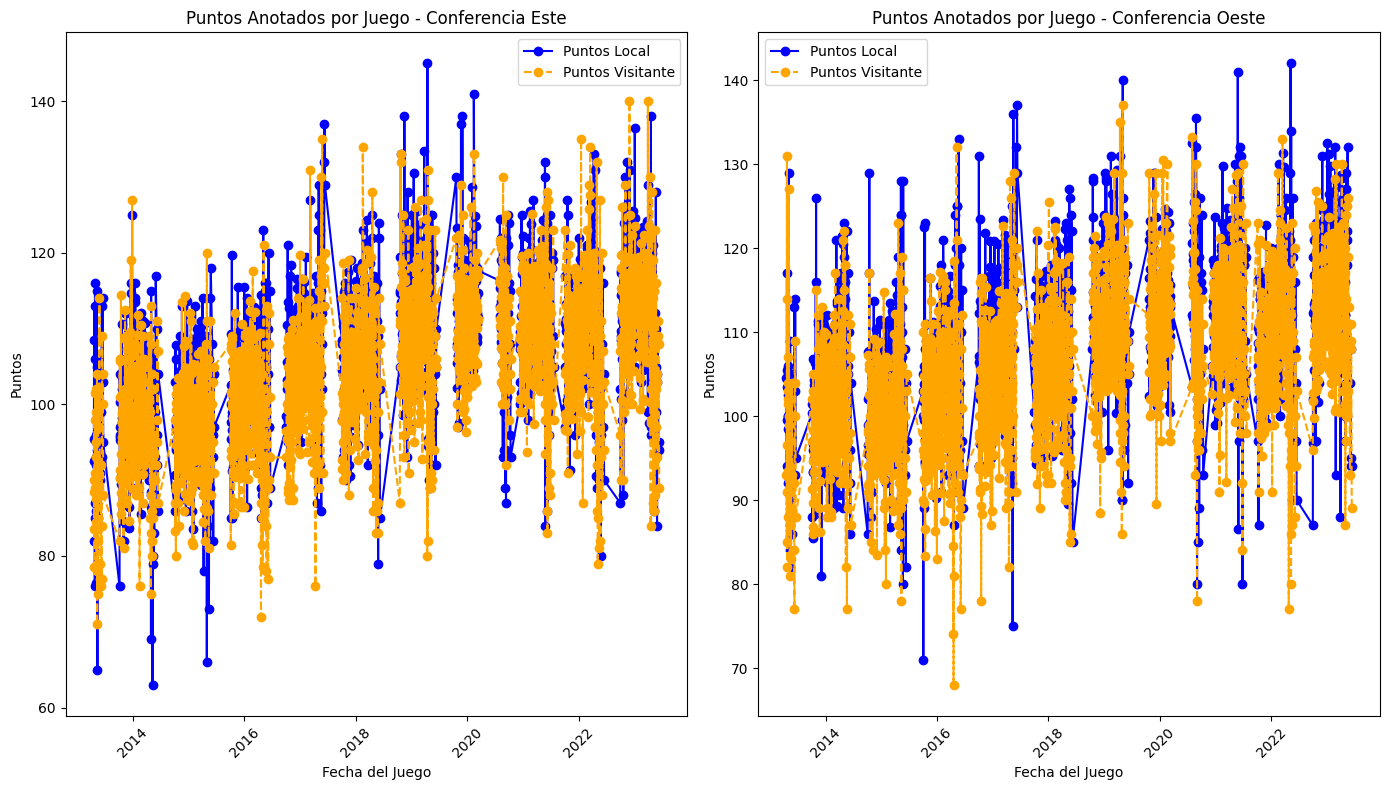

In [67]:
# Puntos Anotados por Juego - Conferencia

plt.figure(figsize=(14, 8))

# Crear subplots para cada conferencia
conferences = {'Este': conferencia_este, 'Oeste': conferencia_oeste}

for i, (conference, teams) in enumerate(conferences.items(), 1):
    plt.subplot(1, 2, i)
    
    # Filtrar datos por equipos de esta conferencia
    conference_data = game_data[game_data['team_name_home'].isin(teams) | game_data['team_name_away'].isin(teams)]
    
    # Calcular puntos anotados por juego
    pts_home = conference_data.groupby('game_date')['pts_home'].mean()
    pts_away = conference_data.groupby('game_date')['pts_away'].mean()
    
    # Graficar puntos anotados por juego para esta conferencia
    plt.plot(pts_home.index, pts_home.values, label='Puntos Local', marker='o', linestyle='-', color='blue')
    plt.plot(pts_away.index, pts_away.values, label='Puntos Visitante', marker='o', linestyle='--', color='orange')

    plt.xlabel('Fecha del Juego')
    plt.ylabel('Puntos')
    plt.title(f'Puntos Anotados por Juego - Conferencia {conference}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()




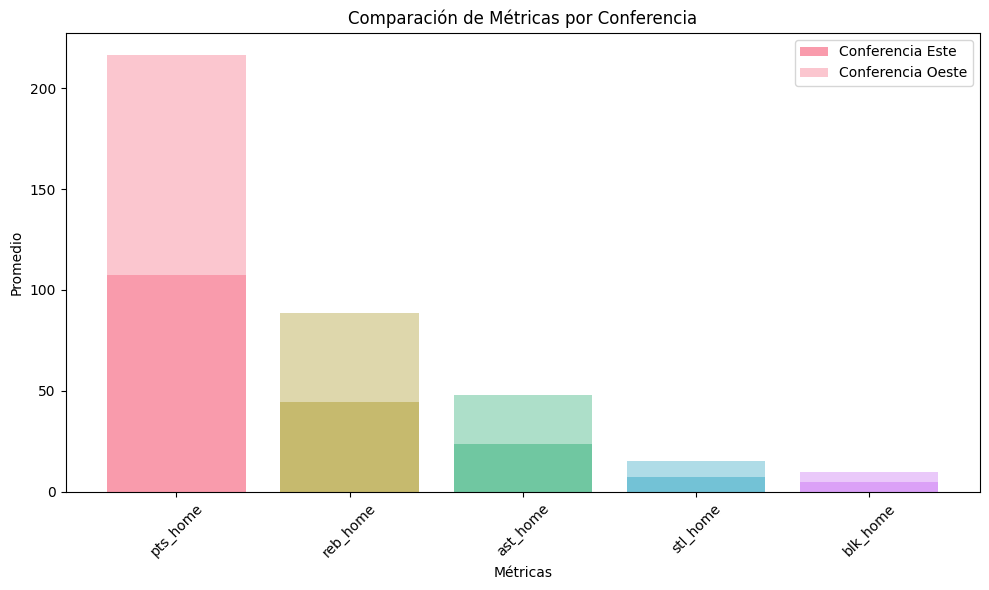

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos por conferencia Este y Oeste
conference_data_este = game_data[game_data['team_name_home'].isin(conferencia_este) | game_data['team_name_away'].isin(conferencia_este)]
conference_data_oeste = game_data[game_data['team_name_home'].isin(conferencia_oeste) | game_data['team_name_away'].isin(conferencia_oeste)]

# Calcular promedios por conferencia
metrics = ['pts_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home']
mean_metrics_este = conference_data_este[metrics].mean()
mean_metrics_oeste = conference_data_oeste[metrics].mean()

# Configurar colores
palette = sns.color_palette("husl", n_colors=len(metrics))

# Crear figura y ejes
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Graficar barras apiladas para conferencia Este
ax.bar(metrics, mean_metrics_este, label='Conferencia Este', color=palette, alpha=0.7)

# Graficar barras apiladas para conferencia Oeste
ax.bar(metrics, mean_metrics_oeste, bottom=mean_metrics_este, label='Conferencia Oeste', color=palette, alpha=0.4)

# Añadir etiquetas y título
plt.xlabel('Métricas')
plt.ylabel('Promedio')
plt.title('Comparación de Métricas por Conferencia')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


#### Conclusiones Generales

1. **Aumento de la Ofensiva**: Ambos gráficos sugieren que el nivel ofensivo en la liga ha incrementado en los últimos años, con un aumento notable en los puntos anotados por juego.

2. **Dominio de la Conferencia Este en Puntos y Rebotes**: La Conferencia Este parece tener una ligera ventaja en términos de puntos anotados y rebotes en casa.

3. **Equilibrio en Otras Métricas**: Para asistencias, robos y bloqueos, ambas conferencias muestran un rendimiento similar, indicando un equilibrio en estas áreas del juego.

4. **Tendencia de la Conferencia Este**: La Conferencia Este podría estar marcando una tendencia en términos de puntos anotados y rebotes. Esta tendencia se observa especialmente en los puntos anotados en casa, donde la Conferencia Este supera a la Conferencia Oeste. Sin embargo, en otras métricas como asistencias, robos y bloqueos, la diferencia entre las conferencias no es tan significativa.



### Porcentaje de Tiros de Campo por Equipo y por conferencias

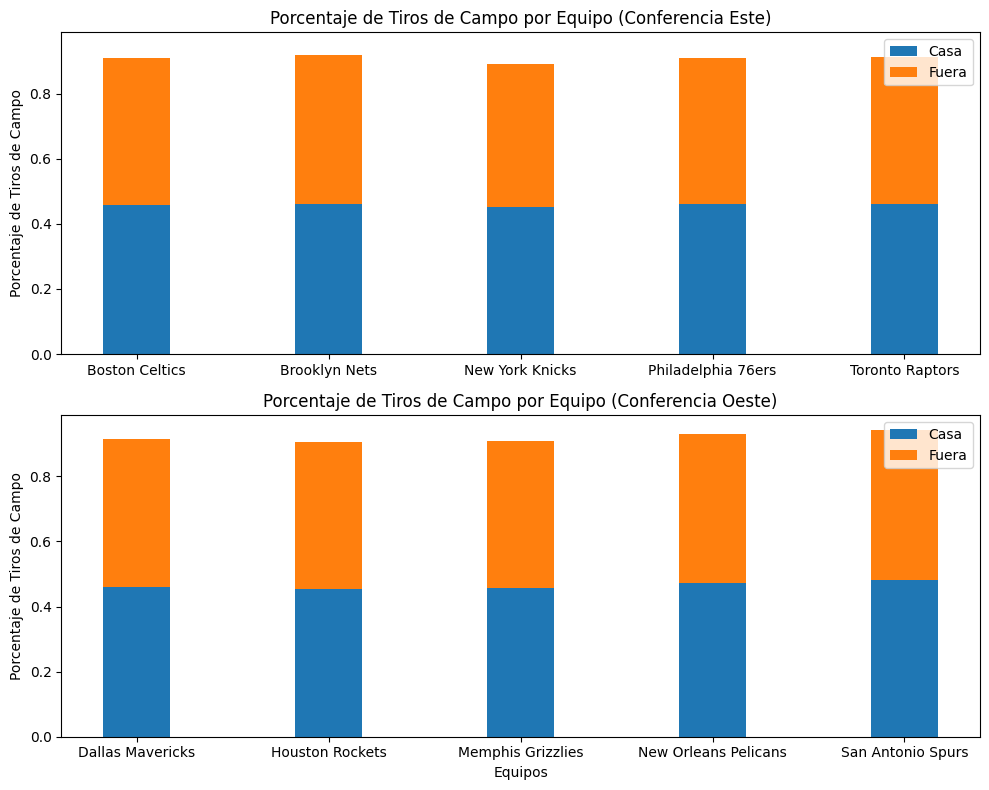

In [77]:
# Porcentaje de Tiros de Campo por Equipo y por conferencias

# Obtener nombres de equipos por conferencia desde el diccionario
conferencia_este = equipos_nba["Este"]
conferencia_oeste = equipos_nba["Oeste"]

# Tomar los primeros 5 equipos de cada conferencia como muestra
teams_este = conferencia_este[:5]
teams_oeste = conferencia_oeste[:5]

# Calcular los porcentajes de tiros de campo para casa y fuera
fg_pct_home_este = game_data[game_data['team_name_home'].isin(teams_este)].groupby('team_name_home')['fg_pct_home'].mean().tolist()
fg_pct_away_este = game_data[game_data['team_name_away'].isin(teams_este)].groupby('team_name_away')['fg_pct_away'].mean().tolist()

fg_pct_home_oeste = game_data[game_data['team_name_home'].isin(teams_oeste)].groupby('team_name_home')['fg_pct_home'].mean().tolist()
fg_pct_away_oeste = game_data[game_data['team_name_away'].isin(teams_oeste)].groupby('team_name_away')['fg_pct_away'].mean().tolist()

# Configurar el gráfico
fig, axs = plt.subplots(2, figsize=(10, 8), sharey=True)

# Para conferencia Este
axs[0].bar(teams_este, fg_pct_home_este, width=0.35, label='Casa')
axs[0].bar(teams_este, fg_pct_away_este, width=0.35, label='Fuera', bottom=fg_pct_home_este)
axs[0].set_ylabel('Porcentaje de Tiros de Campo')
axs[0].set_title('Porcentaje de Tiros de Campo por Equipo (Conferencia Este)')
axs[0].legend()

# Para conferencia Oeste
axs[1].bar(teams_oeste, fg_pct_home_oeste, width=0.35, label='Casa')
axs[1].bar(teams_oeste, fg_pct_away_oeste, width=0.35, label='Fuera', bottom=fg_pct_home_oeste)
axs[1].set_xlabel('Equipos')
axs[1].set_ylabel('Porcentaje de Tiros de Campo')
axs[1].set_title('Porcentaje de Tiros de Campo por Equipo (Conferencia Oeste)')
axs[1].legend()

plt.tight_layout()
plt.show()




